# Import libs and Load data

In [24]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [27]:
path = "D:\Python - AIT2003 1\Final Project__22022564\Data\zoeyphuong124_raw.npy"
post_list = np.load(path, allow_pickle=True)
post_df_full = pd.read_excel("D:\Python - AIT2003 1\Final Project__22022564\Data\zoeyphuong124_raw.xlsx")

# Prepare for analyzing

In [28]:
post_df_omitted = post_df_full[['post_id','text', 'time', 'timestamp', 'comments', 'shares', 'post_url', 'links', 'user_id', 'username', 'user_url', 'comments_full', 'reactions', 'reaction_count']]

In [29]:
post_reacts = post_df_omitted.copy()
post_reacts['reactions'] = post_reacts['reactions'].apply(lambda x : dict(eval(x)))
post_df_full_reactions = post_reacts['reactions'].apply(pd.Series)
post_df_full_with_reactions = pd.concat([post_reacts, post_df_full_reactions], axis=1).drop('reactions', axis=1)
post_df_full_with_reactions[['text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10600\2043888804.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  post_df_full_reactions = post_reacts['reactions'].apply(pd.Series)


text   thích  yêu thích  \
0    Chuyện yêu người nhạy cảm\n\nSau một thời gian...  2949.0     1473.0   
1    Rizz không hay nhưng cũng tạm ổn đến từ Duy Ph...   969.0       29.0   
2    Trời sắp lạnh rồi, liệu mình có thể để răng ha...  1226.0       14.0   
3    Mai tháng 11, mời anh em cốc nâu lắc:\nNâu lắc...  4682.0       43.0   
4    Babi ơi, tất cả những gì được đánh lên mặt em ...  6640.0      949.0   
..                                                 ...     ...        ...   
126  Mẹ cứ giục đi xem mắt\nMắt thôi thì xem làm gì...  1222.0        8.0   
127  Năm tháng cứ tưởng giấc chiêm bao\nDông qua xu...   483.0       54.0   
128  Lúc ra về em đừng hỏi anh đi đằng nào\nVì đằng...  5260.0       84.0   
129  Tôi nhận ra mình già khi có em gái hỏi\n"Anh t...  1276.0       14.0   
130  Em cứ nói những gì em muốn\nnhưng chưa chắc em...  1818.0       67.0   

       haha  wow    buồn  phẫn nộ  thương thương  shares  comments  \
0       4.0  3.0    20.0      NaN           88.0    1546       269   
1     325.0  1.0    55.0      NaN            3.0     155        46   
2     418.0  5.0   153.0      NaN            4.0      64        80   
3    2342.0  7.0   714.0      3.0           12.0     237       442   
4    1704.0  7.0    97.0      1.0           69.0     486       253   
..      ...  ...     ...      ...            ...     ...       ...   
126   425.0  1.0   112.0      1.0            3.0      25        58   
127   173.0  NaN    13.0      NaN            3.0      31        36   
128  2516.0  3.0  1210.0      2.0           15.0     221      1276   
129   670.0  6.0   279.0      NaN            2.0      31       113   
130    35.0  1.0    46.0      1.0            4.0     134        69   

     reaction_count  
0              4537  
1              1382  
2              1820  
3              7803  
4              9467  
..              ...  
126            1772  
127             726  
128            9090  
129            2247  
130            1972  

[131 rows x 11 columns]

In [30]:
for i in range(0, len(post_df_full_with_reactions['thích'].values), 1):
    if pd.isna(post_df_full_with_reactions['thích'].values[i]):
        post_df_full_with_reactions['thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['yêu thích'].values[i]):
        post_df_full_with_reactions['yêu thích'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['haha'].values[i]):
        post_df_full_with_reactions['haha'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['wow'].values[i]):
        post_df_full_with_reactions['wow'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['buồn'].values[i]):
        post_df_full_with_reactions['buồn'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['phẫn nộ'].values[i]):
        post_df_full_with_reactions['phẫn nộ'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['thương thương'].values[i]):
        post_df_full_with_reactions['thương thương'].values[i] = 0

    if pd.isna(post_df_full_with_reactions['shares'].values[i]):
        post_df_full_with_reactions['shares'].values[i] = 0
    
    if pd.isna(post_df_full_with_reactions['comments'].values[i]):
        post_df_full_with_reactions['comments'].values[i] = 0

post_df_full_with_reactions[['text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

text   thích  yêu thích  \
0    Chuyện yêu người nhạy cảm\n\nSau một thời gian...  2949.0     1473.0   
1    Rizz không hay nhưng cũng tạm ổn đến từ Duy Ph...   969.0       29.0   
2    Trời sắp lạnh rồi, liệu mình có thể để răng ha...  1226.0       14.0   
3    Mai tháng 11, mời anh em cốc nâu lắc:\nNâu lắc...  4682.0       43.0   
4    Babi ơi, tất cả những gì được đánh lên mặt em ...  6640.0      949.0   
..                                                 ...     ...        ...   
126  Mẹ cứ giục đi xem mắt\nMắt thôi thì xem làm gì...  1222.0        8.0   
127  Năm tháng cứ tưởng giấc chiêm bao\nDông qua xu...   483.0       54.0   
128  Lúc ra về em đừng hỏi anh đi đằng nào\nVì đằng...  5260.0       84.0   
129  Tôi nhận ra mình già khi có em gái hỏi\n"Anh t...  1276.0       14.0   
130  Em cứ nói những gì em muốn\nnhưng chưa chắc em...  1818.0       67.0   

       haha  wow    buồn  phẫn nộ  thương thương  shares  comments  \
0       4.0  3.0    20.0      0.0           88.0    1546       269   
1     325.0  1.0    55.0      0.0            3.0     155        46   
2     418.0  5.0   153.0      0.0            4.0      64        80   
3    2342.0  7.0   714.0      3.0           12.0     237       442   
4    1704.0  7.0    97.0      1.0           69.0     486       253   
..      ...  ...     ...      ...            ...     ...       ...   
126   425.0  1.0   112.0      1.0            3.0      25        58   
127   173.0  0.0    13.0      0.0            3.0      31        36   
128  2516.0  3.0  1210.0      2.0           15.0     221      1276   
129   670.0  6.0   279.0      0.0            2.0      31       113   
130    35.0  1.0    46.0      1.0            4.0     134        69   

     reaction_count  
0              4537  
1              1382  
2              1820  
3              7803  
4              9467  
..              ...  
126            1772  
127             726  
128            9090  
129            2247  
130            1972  

[131 rows x 11 columns]

# The relationship between the number of comments, shares and post_id

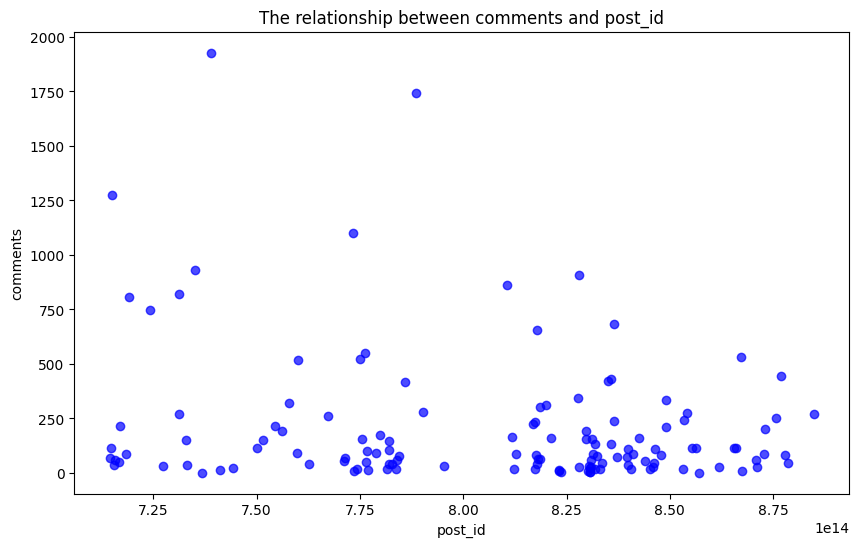

In [31]:
post_cmt_raw = post_df_omitted.copy()
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(post_cmt_raw['post_id'], post_cmt_raw['comments'], color='blue', alpha=0.7)

# Add title and label
plt.title('The relationship between comments and post_id')
plt.xlabel('post_id')
plt.ylabel('comments')

plt.show()


In [32]:
index_max_comments = post_cmt_raw['comments'].idxmax()

post_id_max_comments = post_cmt_raw.loc[index_max_comments, 'post_id']
text_post_max_comments = post_cmt_raw.loc[index_max_comments, 'text']
time_post_max_comments = post_cmt_raw.loc[index_max_comments, 'time']

print(post_id_max_comments)
print(text_post_max_comments)
print(time_post_max_comments)

738930277592851
Dị ứng với hải sản, cụ thể là trai
2023-02-15 14:44:12


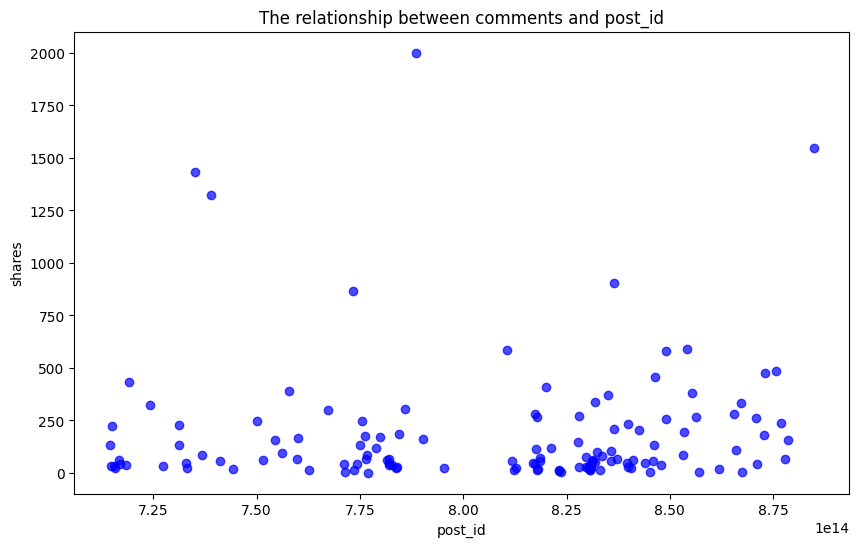

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(post_cmt_raw['post_id'], post_cmt_raw['shares'], color='blue', alpha=0.7)

# Add title and label
plt.title('The relationship between comments and post_id')
plt.xlabel('post_id')
plt.ylabel('shares')

plt.show()

In [34]:
index_max_shares = post_cmt_raw['shares'].idxmax()

post_id_max_shares = post_cmt_raw.loc[index_max_shares, 'post_id']
text_post_max_shares = post_cmt_raw.loc[index_max_shares, 'text']
time_post_max_shares = post_cmt_raw.loc[index_max_shares, 'time']

print(post_id_max_shares)
print(text_post_max_shares)
print(time_post_max_shares)

788540482631830
Có cái nóng nào bằng cái nóng lòng được gặp em
2023-05-17 17:39:21


# Find posts containing a specific word 

In [35]:
a = post_df_full_with_reactions['text'].tolist()
print('There are totally', len(a), 'posts.')
res = []
for i in a:
    if 'yêu' in i: res.append(i)
print('There are', len(res), 'posts containing the word: yêu')
res 

There are totally 131 posts.
There are 20 posts containing the word: yêu


['Chuyện yêu người nhạy cảm\n\nSau một thời gian mở tổng đài lắng nghe (ở ig) thì tớ muốn chia sẻ một chút về cách yêu và chăm sóc một người nhạy cảm, nhiều issue, trauma, thậm chí có thể là mentally ill, trầm cảm,...\nDựa trên kinh nghiệm yêu những nyc, những gì tớ đọc được và học được khi yêu. Dựa trên những lần động viên, xoa dịu các anh chị em tớ quen. Dựa trên những quyển sách tớ đọc và những lần lắng nghe chuyện từ người khác.\n\n🥺 Mình có thể cho họ những gì:\n\n- Sự kiên nhẫn. Đây là điều đầu tiên vì chắc chắn các bạn sẽ phải chịu đựng năng lượng tiêu cực, rất nhiều.\nKiên nhẫn với họ, kiên nhẫn với bản thân, để bao dung hơn, chịu được lâu hơn, kiểm soát bản thân tốt hơn để chăm họ mà không làm họ tổn thương thêm.\nGood thing takes time\n\n- Lời khen, lời động viên. Dành cho tất cả những gì nhỏ nhất, như là mới uống thuốc, ăn đủ bữa, kẻ mắt đẹp, làm xong bài tập,... mọi thứ họ khoe đều có thể khen. Thậm chí, tìm ra thứ để khen. Khen nhiều, hở ra là khen.\nĐiều này giúp họ có th

In [36]:
# Create a list of dictionaries containing post_id, text, and reaction_count
result_data = [{'post_id': row['post_id'], 'text': row['text'], 'reaction_count': row['reaction_count'], 'comments': row['comments'], 'shares': row['shares']}
               for _, row in post_df_full_with_reactions.iterrows() if row['text'] in res]

# Convert the list of dictionaries to a DataFrame
result_df = pd.DataFrame(result_data)

# Display the result
print(result_df)


            post_id                                               text  \
0   884944059658138  Chuyện yêu người nhạy cảm\n\nSau một thời gian...   
1   872852880867256  Chuyện tình yêu, lúc nào cũng thế\nlúc thề cũn...   
2   870841004401777  101 lý do anh yêu em, lưu về dùng dần\nPart 3\...   
3   867384828080728  Sharing những gì mình đang làm. Admin mở tổng ...   
4   867201654765712  Gió đưa cành trúc la đà\nYêu vào ngu lắm, nên ...   
5   865616458257565  Chào ace\n\nMột tuần vừa qua tôi phóng xe máy ...   
6   856221335863744  101 lý do anh yêu em\nPart 2\n\n21. Mỗi ngày a...   
7   853135196172358          Đã đem lòng yêu thì không điêu lòng em <3   
8   849115986574279  101 lý do anh yêu em. Lưu lại dùng dần. Part 1...   
9   847874866698391  Tôi cân nhắc trước những cánh cửa tình yêu\nDo...   
10  830730675079477  Ước gì em được yêu thương\nKhông phải xô lệch ...   
11  830690608416817  - Tại sao không nên yêu ons?\n- Yêu là phải xứ...   
12  823112682507943  Cuộc đời anh có b

# Statistic word

In [37]:
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS

In [38]:
post_df_full_with_reactions['text']
text = "" 
for i in post_df_full_with_reactions['text']:
  text=text+i+"\n"

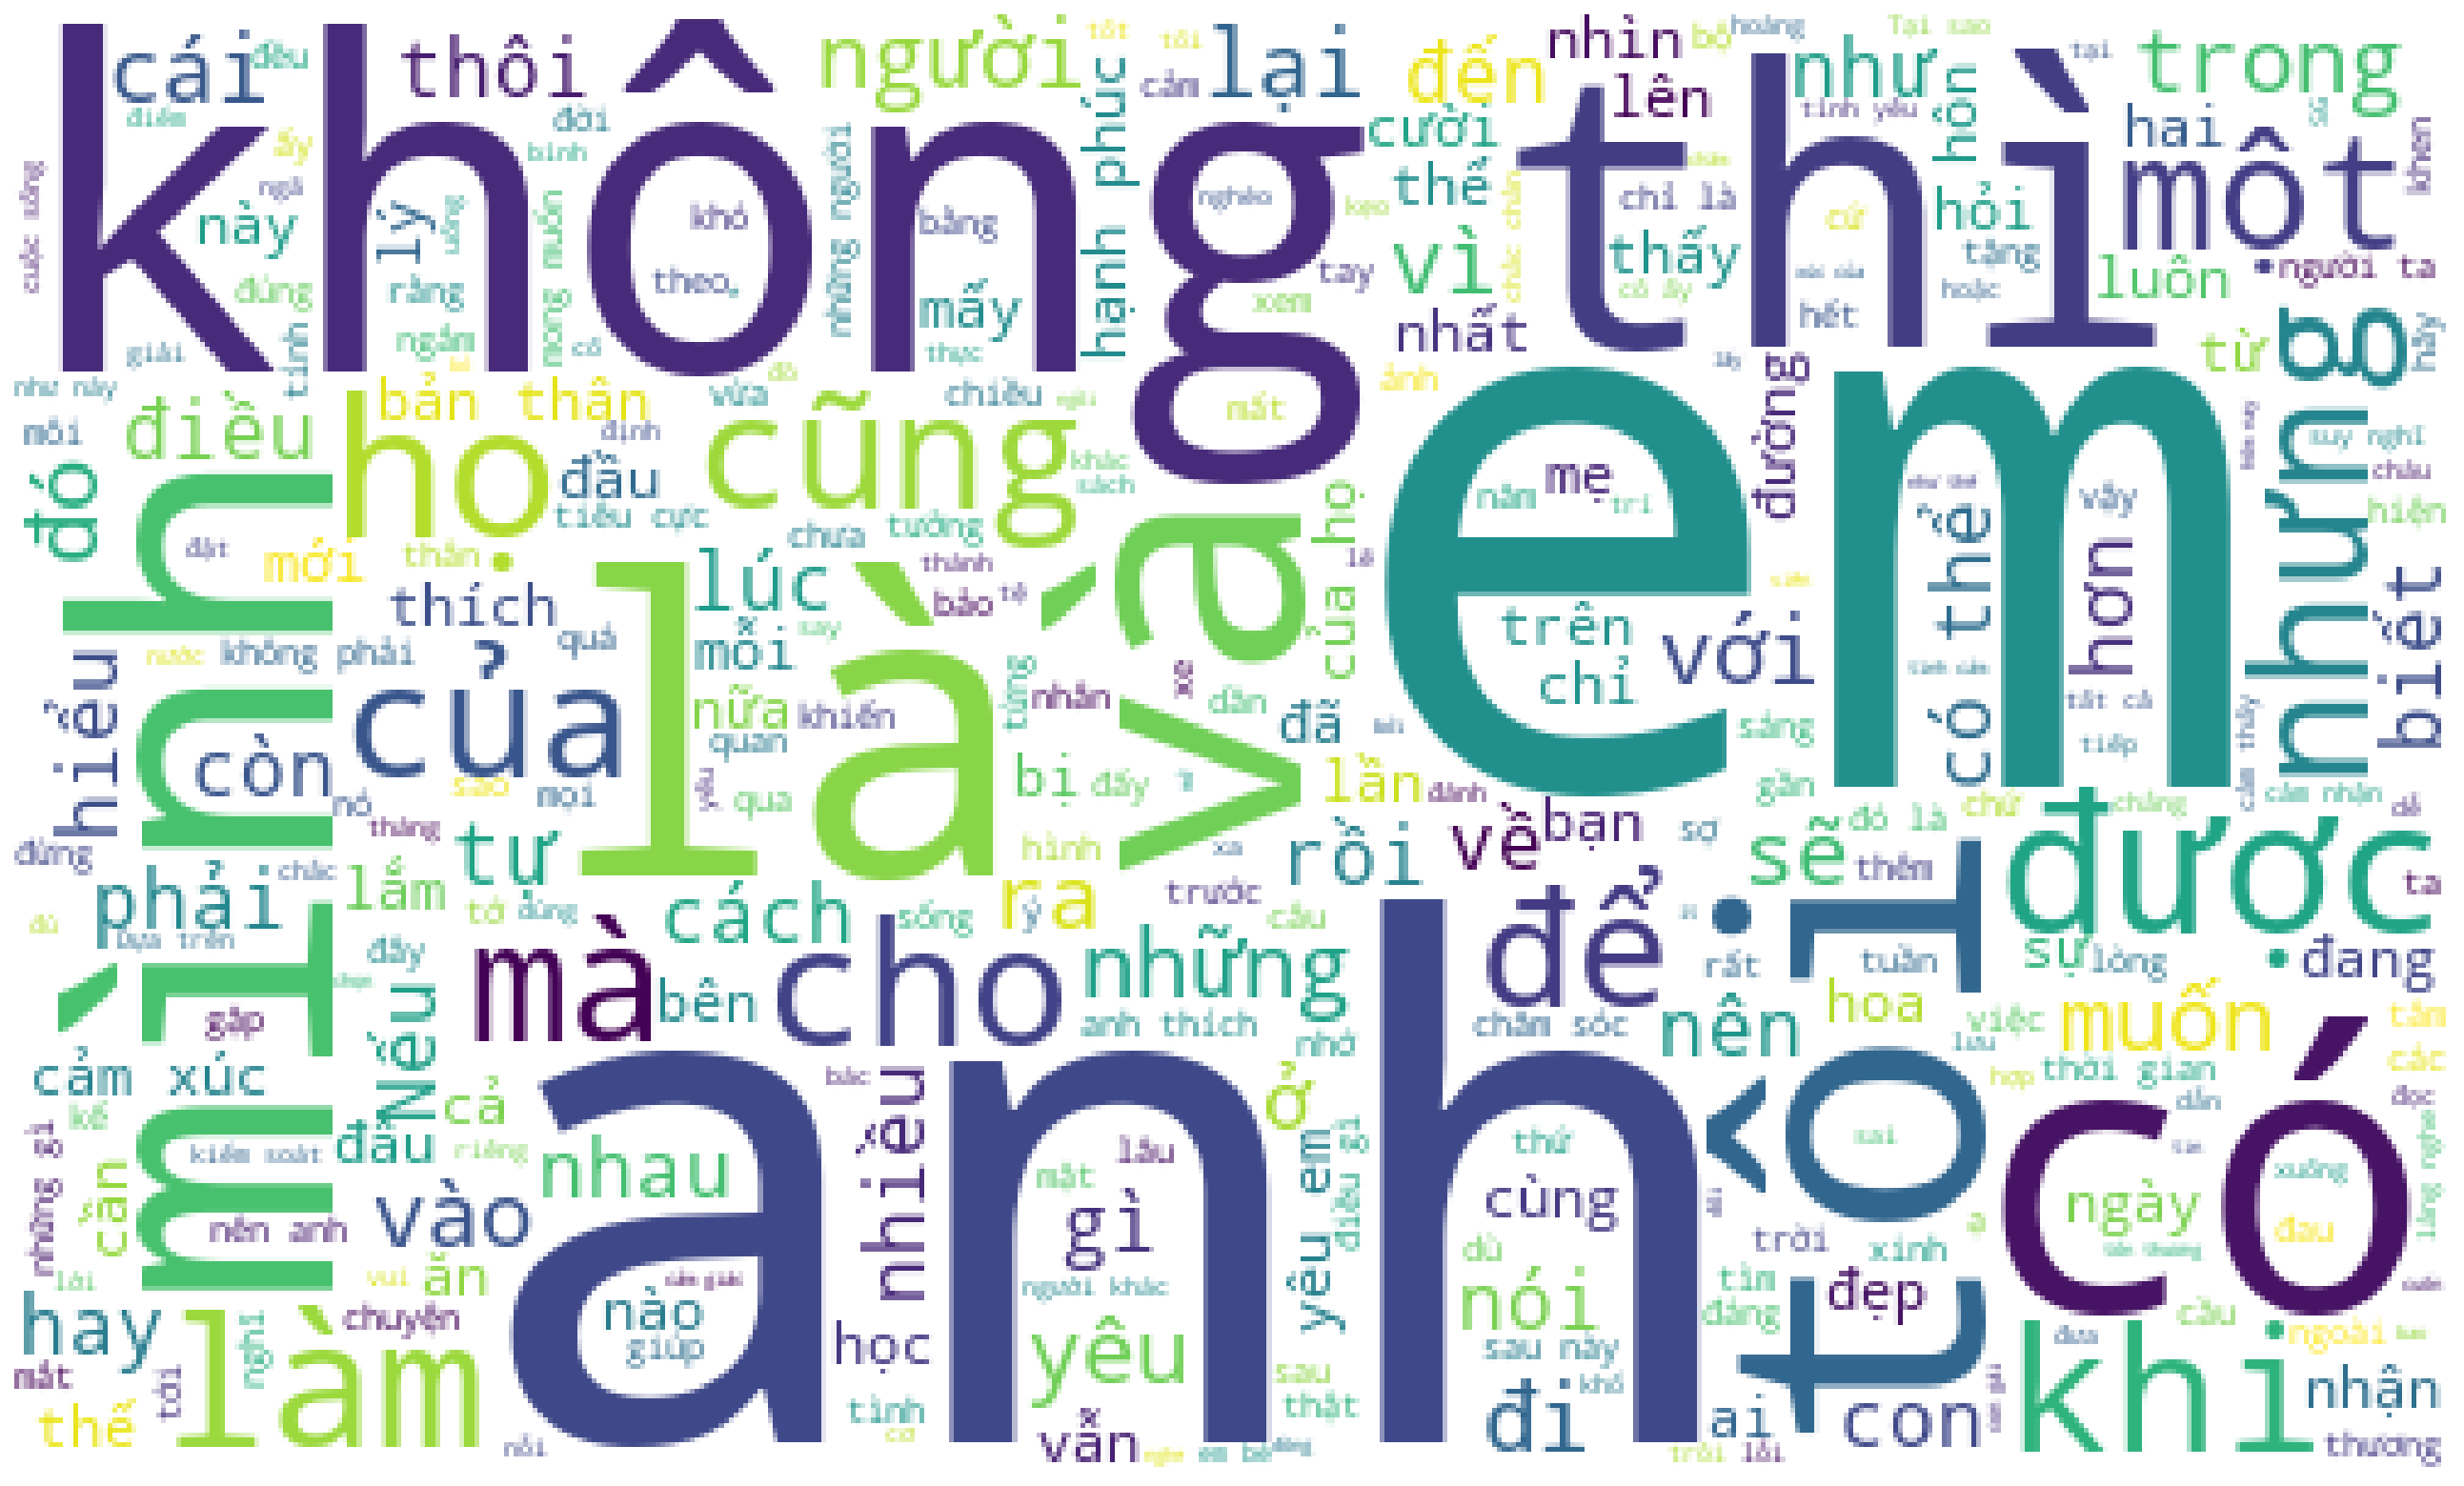

In [39]:
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', max_words=300, width=500, height=300).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Analyze comments

In [40]:
post_list = post_list.tolist()

In [41]:
# Show comments in each post
res=[]
for post in post_list:
    if len(post['comments_full']) > 0:
      print(post['comments_full'])
      cmt = '\n'.join([comment['comment_text'] for comment in post['comments_full']])
      res.append(cmt)
print(len(res))
print(res)

[{'comment_id': '1289454908396901', 'comment_url': 'https://facebook.com/1289454908396901', 'commenter_id': '100005727012095', 'commenter_url': 'https://facebook.com/hatien.buitran?eav=AfYr_yr5pf-8clEYfRR1ciHkZO3EGoxDozVdwKZ2B1cnQcOBsfLbW97SV1VlFCYLaJY&fref=nf&rc=p&refid=52&__tn__=R&paipv=0', 'commenter_name': 'Bùi Trần Hà Tiên', 'commenter_meta': 'Fan cứng', 'comment_text': 'Duy Phương nói như cách bồ hiện tại đang chăm tôi z, tự nhiên liệt kê ra cũng thấy mình khó chăm thế nhờ =)))', 'comment_time': datetime.datetime(2023, 11, 17, 0, 0), 'comment_image': 'https://scontent.fhan2-3.fna.fbcdn.net/m1/v/t6/An_F9bJG7govfshSMBkvcRLcxT0jmiXVYKtr7lgH5AHgUrjjpZ1OD0xyxXYgf7arc0lWgCdrR_KN4Mg7RSN3Gm3W6Gg03N1tQ-ZXzVvFJ_KvvB4.png?ccb=10-5&oh=00_AfBYsKZNWUVwi3mxsCE4T28Kr1wRzyryFsvEtpyVrLowEg&oe=6590F4E7&_nc_sid=7da55a', 'comment_reactors': [{'name': 'Chữ nghĩa là gì?', 'link': 'https://facebook.com/zoeyphuong124?eav=AfbQFXYukeNPk5hIuXSR_3oUBJwI5FKSuBPdXe-oIunCy7HuwSvkbISx0V3WPTV8Izk&fref=pb&paipv=0'

In [42]:
res

['Duy Phương nói như cách bồ hiện tại đang chăm tôi z, tự nhiên liệt kê ra cũng thấy mình khó chăm thế nhờ =)))\nCảm ơn sốp, bài này rất hữu ích và có ý nghĩa\nnghe ấm lòng thật sự 🌷\nHay quá huhuh tui trải qua hết rồi nàyyy\nGữi lời cảm ơn tới bạn ấy dù chỉ đồng hành một thời gian ngắn ngũi nhưng đã chữa lành mình \U0001faf0🏻\nXin loi vi da nhay cam\nCảm ơn yêu 🌷\nCảm ơn nha 🙈🙈\nThảo Vy Nguyễn Huỳnh đọc lấy kinh nghịm ik :> sau này dính đỡ bỡ ngỡ\nLinh Thỏ\nTớ ít khi cmt lắm, nhưng đọc bài này phải dừng lại viết vài câu chữ. 10 điểm không có nhưng ặ\nỦa share mà chưa cmt khen Duy Phương 🌹. T còn phải học nhiều thẹc, ny tương lai của t cũng nên z hê hê\nDamn, cần đọc đi đọc lại tới khi thấm vào niềm tin và tư tưởng🧑🏻\u200d🦯\nDuy Phương nói đúng tiếng lòng em luôn ýyy🥺post này 💯 điểm cũng k đủ\nChợt nhớ 1 câu trong "Niệm khúc cuối"\n"Dù sao, dù sao đi nữa...xin vẫn yêu em"\nnhay cam kho that\nhay nhỉ\nnghe ấm lòng thật sự 😅',
 'anh nên feature spooky rizz của em\nTuấn Dũng bí kíp kiếm v

In [43]:
text=""
for i in res:
  text=text+i+" . "
text

'Duy Phương nói như cách bồ hiện tại đang chăm tôi z, tự nhiên liệt kê ra cũng thấy mình khó chăm thế nhờ =)))\nCảm ơn sốp, bài này rất hữu ích và có ý nghĩa\nnghe ấm lòng thật sự 🌷\nHay quá huhuh tui trải qua hết rồi nàyyy\nGữi lời cảm ơn tới bạn ấy dù chỉ đồng hành một thời gian ngắn ngũi nhưng đã chữa lành mình \U0001faf0🏻\nXin loi vi da nhay cam\nCảm ơn yêu 🌷\nCảm ơn nha 🙈🙈\nThảo Vy Nguyễn Huỳnh đọc lấy kinh nghịm ik :> sau này dính đỡ bỡ ngỡ\nLinh Thỏ\nTớ ít khi cmt lắm, nhưng đọc bài này phải dừng lại viết vài câu chữ. 10 điểm không có nhưng ặ\nỦa share mà chưa cmt khen Duy Phương 🌹. T còn phải học nhiều thẹc, ny tương lai của t cũng nên z hê hê\nDamn, cần đọc đi đọc lại tới khi thấm vào niềm tin và tư tưởng🧑🏻\u200d🦯\nDuy Phương nói đúng tiếng lòng em luôn ýyy🥺post này 💯 điểm cũng k đủ\nChợt nhớ 1 câu trong "Niệm khúc cuối"\n"Dù sao, dù sao đi nữa...xin vẫn yêu em"\nnhay cam kho that\nhay nhỉ\nnghe ấm lòng thật sự 😅 . anh nên feature spooky rizz của em\nTuấn Dũng bí kíp kiếm vợ 2

In [44]:
text_fix=text 
print(len(text))
text

69718


'Duy Phương nói như cách bồ hiện tại đang chăm tôi z, tự nhiên liệt kê ra cũng thấy mình khó chăm thế nhờ =)))\nCảm ơn sốp, bài này rất hữu ích và có ý nghĩa\nnghe ấm lòng thật sự 🌷\nHay quá huhuh tui trải qua hết rồi nàyyy\nGữi lời cảm ơn tới bạn ấy dù chỉ đồng hành một thời gian ngắn ngũi nhưng đã chữa lành mình \U0001faf0🏻\nXin loi vi da nhay cam\nCảm ơn yêu 🌷\nCảm ơn nha 🙈🙈\nThảo Vy Nguyễn Huỳnh đọc lấy kinh nghịm ik :> sau này dính đỡ bỡ ngỡ\nLinh Thỏ\nTớ ít khi cmt lắm, nhưng đọc bài này phải dừng lại viết vài câu chữ. 10 điểm không có nhưng ặ\nỦa share mà chưa cmt khen Duy Phương 🌹. T còn phải học nhiều thẹc, ny tương lai của t cũng nên z hê hê\nDamn, cần đọc đi đọc lại tới khi thấm vào niềm tin và tư tưởng🧑🏻\u200d🦯\nDuy Phương nói đúng tiếng lòng em luôn ýyy🥺post này 💯 điểm cũng k đủ\nChợt nhớ 1 câu trong "Niệm khúc cuối"\n"Dù sao, dù sao đi nữa...xin vẫn yêu em"\nnhay cam kho that\nhay nhỉ\nnghe ấm lòng thật sự 😅 . anh nên feature spooky rizz của em\nTuấn Dũng bí kíp kiếm vợ 2

In [45]:
%pip install -U nltk
%pip install rake-nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import nltk

In [47]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [48]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import tokenize
import math
from operator import itemgetter

stop_words = ['đã không', 'gần hết', 'tỏ ra', 'nói nhỏ', 'thúng thắng', 'từ loại', 'bao nhiêu', 'ăn làm', 'phỉ phui', 'chứ như', 'vung thiên địa', 'sang sáng', 'tại đâu', 'ông từ', 'giữa lúc', 'giờ đây', 'câu hỏi', 'không điều kiện', 'khẳng định', 'chốc chốc', 'lấy ra', 'nước xuống', 'nói là', 'sau đó', 'là phải', 'về không', 'dành dành', 'làm tăng', 'có tháng', 'tất cả bao nhiêu', 'nhìn theo', 'ơ kìa', 'cho được', 'ầu ơ', 'trong này', 'ối giời', 'tránh khỏi', 'ứ hự', 'chẳng nữa', 'cần số', 'phải rồi', 'đã thế', 'khó chơi', 'ờ ờ', 'sẽ hay', 'đưa chuyện', 'lượng số', 'cơ cùng', 'cho rằng', 'lúc này', 'quan trọng', 'ăn chung', 'vài điều', 'đang tay', 'lòng không', 'tới nơi', 'chết thật', 'cha chả', 'tăng cấp', 'ý chừng', 'đưa em', 'căn tính', 'chắc người', 'này nọ', 'rén bước', 'mỗi lúc', 'căn cắt', 'bất kể', 'ai nấy', 'ba ngày', 'bất quá', 'ráo cả', 'chu cha', 'bằng nào', 'đủ nơi', 'thực vậy', 'tại nơi', 'tha hồ', 'ăn hỏi', 'sử dụng', 'cảm ơn', 'ào vào', 'duy chỉ', 'đâu đây', 'ngộ nhỡ', 'vài nơi', 'biết mình', 'thường tại', 'trong mình', 'ô kìa', 'trước đây', 'vừa lúc', 'đâu cũng', 'thời điểm', 'từng ấy', 'ở được', 'cùng cực', 'khó nghĩ', 'vùng nước', 'quá tuổi', 'cật sức', 'thiếu điểm', 'dạ khách', 'chắc ăn', 'lần khác', 'tột cùng', 'tuần tự', 'những là', 'tự ý', 'bởi thế', 'thục mạng', 'trước ngày', 'tuốt tuồn tuột', 'trong ngoài', 'hiện nay', 'dù cho', 'thuộc bài', 'nữa khi', 'chịu chưa', 'không hay', 'thật sự', 'thà rằng', 'đặt mức', 'thậm từ', 'nhằm vào', 'dù sao', 'như không', 'bấy lâu nay', 'tuyệt nhiên', 'ngày đến', 'thích ý', 'thế sự', 'nghe chừng', 'đúng ngày', 'bộ thuộc', 'để giống', 'chưa dễ', 'ông nhỏ', 'thấy tháng', 'ba họ', 'vì chưng', 'càng hay', 'lấy có', 'tự lượng', 'thích tự', 'cơ mà', 'thật ra', 'thích cứ', 'ra ngôi', 'chuyển tự', 'ở đây', 'xon xón', 'dẫu rằng', 'ra tay', 'thường thôi', 'vì rằng', 'bất kì', 'xin gặp', 'thuần ái', 'lúc đi', 'đủ số', 'dễ thấy', 'nhờ đó', 'hơn là', 'thoạt nghe', 'ví phỏng', 'mà lại', 'nhanh lên', 'người khách', 'quả là', 'chưa dùng', 'cứ điểm', 'mỗi lần', 'lượng từ', 'nói riêng', 'khác nào', 'trời đất ơi', 'vị tất', 'bỏ mình', 'nói khó', 'quá mức', 'vèo vèo', 'từ tại', 'cuối cùng', 'phải cách', 'nhận nhau', 'ngày này', 'đáng lý', 'trước khi', 'sở dĩ', 'do vì', 'thường tính', 'đúng với', 'chung cho', 'mà không', 'phải biết', 'ái chà', 'hết nói', 'đâu đâu', 'chành chạnh', 'bỗng nhiên', 'có chăng là', 'ba tăng', 'trừ phi', 'ông tạo', 'như quả', 'nhất nhất', 'đưa tay', 'ngôi thứ', 'về phần', 'trệu trạo', 'sang năm', 'tấm bản', 'để phần', 'bỏ lại', 'từ đó', 'vừa mới', 'sì sì', 'thậm cấp', 'buổi sớm', 'bỏ mất', 'hay hay', 'gây giống', 'hay tin', 'nơi nơi', 'tại đây', 'hết của', 'dễ gì', 'tính cách', 'vâng vâng', 'chùn chũn', 'con nhà', 'gặp khó khăn', 'đều nhau', 'đại loại', 'nếu như', 'một khi', 'trong số', 'qua ngày', 'không ai', 'nói lại', 'riêng từng', 'nghĩ xa', 'lời nói', 'chứ không phải', 'lần tìm', 'trước tiên', 'cả người', 'trong vùng', 'tới gần', 'quả thế', 'thường khi', 'ông ấy', 'tháng ngày', 'xa xả', 'dễ dùng', 'ví bằng', 'chung quy', 'lấy làm', 'thấp thỏm', 'cây nước', 'cô ấy', 'đặc biệt', 'nào là', 'vào khoảng', 'kể như', 'tạo ra', 'dầu sao', 'về nước', 'nhón nhén', 'thích thuộc', 'sáng rõ', 'lại nữa', 'thực hiện', 'chưa từng', 'bấy nay', 'cấp số', 'đặt làm', 'nhớ ra', 'vung tàn tán', 'tắp lự', 'chung cuộc', 'từ khi', 'tuy có', 'có thể', 'như thế nào', 'ối dào', 'dễ như chơi', 'lên nước', 'lấy thế', 'lên số', 'cho tới', 'chứ còn', 'trả của', 'đến thế', 'gì gì', 'trước nay', 'thảo hèn', 'lúc đó', 'nhận việc', 'mang mang', 'không những', 'nào phải', 'trước đó', 'lớn nhỏ', 'thì thôi', 'tuổi cả', 'ra ý', 'quá tin', 'tuy rằng', 'dễ ngươi', 'con dạ', 'để không', 'cứ như', 'bên cạnh', 'tò te', 'chịu tốt', 'không kể', 'nức nở', 'lấy được', 'bỏ xa', 'lấy giống', 'tự tính', 'đến khi', 'vừa rồi', 'chết tiệt', 'sau cùng', 'cao thế', 'sao đang', 'qua chuyện', 'chỉ là', 'cả ăn', 'ba bản', 'ngồi bệt', 'làm dần dần', 'mang nặng', 'rồi đây', 'ăn sáng', 'cả nghĩ', 'cho đến khi', 'tình trạng', 'phần nào', 'tanh tanh', 'không gì', 'đưa cho', 'gì đó', 'sao bằng', 'ra gì', 'bước tới', 'tiếp tục', 'lấy cả', 'chung cục', 'xem ra', 'vậy mà', 'nhằm khi', 'trả ngay', 'có người', 'lên cao', 'phần việc', 'thuộc lại', 'hết cả', 'bất thình lình', 'trực tiếp', 'ấy là', 'ngay lập tức', 'ở vào', 'ai đó', 'cùng tuổi', 'dù rằng', 'vốn dĩ', 'bởi ai', 'thốt nhiên', 'từng phần', 'bằng người', 'số người', 'lại người', 'vài nhà', 'nhờ có', 'khi trước', 'hay sao', 'nữa rồi', 'bấy lâu', 'đồng thời', 'dở chừng', 'đánh giá', 'tìm bạn', 'tên họ', 'mất còn', 'khác nhau', 'dẫu mà', 'ngồi sau', 'chỉ tên', 'ngồi trệt', 'lên ngôi', 'dùng hết', 'vào đến', 'cũng vậy thôi', 'nước ăn', 'cho nên', 'phía bên', 'ăn cuộc', 'nói lên', 'biết đâu đấy', 'đáo để', 'giờ đến', 'đang thì', 'liên quan', 'nhiên hậu', 'nếu có', 'tha hồ chơi', 'ngõ hầu', 'từng nhà', 'lần sang', 'chú dẫn', 'đủ dùng', 'chắc hẳn', 'được lời', 'văng tê', 'ái dà', 'chớ không', 'chính điểm', 'dễ sợ', 'chao ôi', 'khi nên', 'bằng ấy', 'như chơi', 'ôi chao', 'họ xa', 'cật lực', 'cụ thể là', 'phải lời', 'chăng nữa', 'đầy năm', 'có số', 'ơi là', 'lúc khác', 'nghe không', 'con tính', 'đầu tiên', 'sáng thế', 'thốc tháo', 'thế ra', 'vậy thì', 'còn về', 'ngay cả', 'hết ý', 'xuất hiện', 'chưa chắc', 'mọi giờ', 'nhất mực', 'sao bản', 'sắp đặt', 'làm lòng', 'ăn ngồi', 'vậy ư', 'chứ gì', 'xử lý', 'vừa khi', 'nhất luật', 'trên bộ', 'bấy chầy', 'lại quả', 'tà tà', 'cơ hồ', 'nhỏ người', 'làm nên', 'bây bẩy', 'nếu vậy', 'người khác', 'tiếp đó', 'phía dưới', 'biết đâu chừng', 'dạ dài', 'còn nữa', 'có cơ', 'tôi con', 'quá lời', 'cách đều', 'để đến nỗi', 'thế nên', 'xa xa', 'hoàn toàn', 'mở mang', 'nhất tâm', 'vài người', 'phải khi', 'vô luận', 'thời gian tính', 'sáng ý', 'thanh không', 'một lúc', 'nói phải', 'chuyển đạt', 'đầy tuổi', 'tay quay', 'chung quy lại', 'chắc chắn', 'bao giờ', 'từ căn', 'thái quá', 'lấy vào', 'chứ lị', 'biết việc', 'giữ lấy', 'đưa tới', 'tiện thể', 'khi nào', 'như vậy', 'vừa qua', 'veo veo', 'cho biết', 'ngôi nhà', 'những ai', 'nên tránh', 'đã đủ', 'tuy vậy', 'nhất thiết', 'ăn chắc', 'không có gì', 'biết bao nhiêu', 'đều bước', 'giờ lâu', 'bỏ việc', 'đại phàm', 'lại ăn', 'qua đi', 'hoặc là', 'ngay bây giờ', 'làm thế nào', 'nhất định', 'nghe thấy', 'trước tuổi', 'mà vẫn', 'tăm tắp', 'về tay', 'ạ ơi', 'nhận được', 'phía trước', 'chỉ có', 'tránh ra', 'ra người', 'không đầy', 'nghe hiểu', 'phía trên', 'lần lần', 'tỏ vẻ', 'ba ngôi', 'phía bạn', 'trong khi', 'thì ra', 'đây này', 'bỏ riêng', 'lúc lâu', 'bản ý', 'bấy giờ', 'nghe được', 'khác khác', 'cùng tột', 'coi bộ', 'bán thế', 'ô hay', 'tên tự', 'qua khỏi', 'đã vậy', 'chính bản', 'ít nhiều', 'đưa xuống', 'bỗng chốc', 'quay lại', 'không bao lâu', 'không cùng', 'nào đó', 'vẫn thế', 'hay nói', 'còn như', 'dễ thường', 'ngày xửa', 'vâng ý', 'dùng đến', 'mọi khi', 'nhờ chuyển', 'ngay tức thì', 'khó thấy', 'ngay khi đến', 'nhận biết', 'ngay từ', 'ra đây', 'chưa có', 'cái đã', 'một cách', 'của ngọt', 'do vậy', 'đánh đùng', 'quan tâm', 'lên cơn', 'bất đồ', 'bỏ không', 'ráo trọi', 'làm lấy', 'đưa vào', 'sốt sột', 'mọi thứ', 'hay nhỉ', 'khó khăn', 'ồ ồ', 'sự thế', 'lấy xuống', 'ra chơi', 'cho tới khi', 'hầu hết', 'nói rõ', 'xuất kì bất ý', 'nhà làm', 'nhận ra', 'đưa ra', 'nữa là', 'nếu cần', 'thời gian', 'thế thôi', 'đâu phải', 'qua tay', 'đâu đó', 'oai oái', 'tại đó', 'mới hay', 'nhà ngươi', 'lúc đến', 'không thể', 'nhìn nhận', 'thật vậy', 'trong lúc', 'biết đâu', 'công nhiên', 'tuy thế', 'phải lại', 'vị trí', 'bỗng dưng', 'chưa kể', 'số loại', 'tránh tình trạng', 'của tin', 'họ gần', 'xin vâng', 'thế thế', 'đây đó', 'nhận làm', 'tập trung', 'nhớ bập bõm', 'chăn chắn', 'người nhận', 'nước lên', 'không phải không', 'dẫu sao', 'chung ái', 'tức thì', 'cụ thể như', 'bài bác', 'giống như', 'suýt nữa', 'từ ái', 'đặt ra', 'phỏng như', 'có đáng', 'nhận thấy', 'trả trước', 'hơn trước', 'tìm việc', 'mỗi một', 'nếu được', 'ở như', 'chứ không', 'những như', 'chí chết', 'bỏ nhỏ', 'chưa bao giờ', 'giống người', 'hết chuyện', 'dùng làm', 'ứ ừ', 'cùng ăn', 'nhất loạt', 'xa tắp', 'luôn cả', 'lần theo', 'không cần', 'lấy ráo', 'đến lời', 'phải cái', 'tha hồ ăn', 'sự việc', 'thực sự', 'điểm gặp', 'bỗng không', 'nhìn chung', 'làm được', 'ngày càng', 'không bán', 'điều gì', 'ít hơn', 'tính người', 'cuối điểm', 'dạ bán', 'chắc lòng', 'vào vùng', 'tuốt tuột', 'dễ khiến', 'đến thì', 'tiếp theo', 'ngăn ngắt', 'để lại', 'vâng dạ', 'cũng như', 'đã là', 'bất ngờ', 'hãy còn', 'nói ra', 'giảm thấp', 'nói thêm', 'ví thử', 'ít ra', 'chắc vào', 'nước cùng', 'bây chừ', 'chứ sao', 'bài cái', 'ừ ào', 'thuộc từ', 'từng cái', 'trước kia', 'anh ấy', 'ăn chịu', 'tự khi', 'những muốn', 'ngày qua', 'nhiệt liệt', 'à ơi', 'bằng không', 'nghĩ tới', 'có ngày', 'tìm hiểu', 'khó biết', 'bất chợt', 'người hỏi', 'toé khói', 'làm ngay', 'giờ này', 'thương ôi', 'vì vậy', 'có phải', 'như thể', 'đến cùng cực', 'như thế', 'xiết bao', 'bất tử', 'căn cái', 'xềnh xệch', 'như trước', 'làm sao', 'ít thấy', 'dài ra', 'cao xa', 'có thế', 'sa sả', 'quá trình', 'phải giờ', 'tự cao', 'thường hay', 'nhận họ', 'yêu cầu', 'làm đúng', 'là nhiều', 'vừa vừa', 'nước bài', 'khá tốt', 'đại để', 'tấm các', 'cái họ', 'cô tăng', 'ví dù', 'sáng ngày', 'vào gặp', 'ngày giờ', 'một vài', 'cần cấp', 'như tuồng', 'khác xa', 'dù dì', 'ngày xưa', 'điểm đầu tiên', 'lên mạnh', 'bây nhiêu', 'thường sự', 'có nhiều', 'ô kê', 'kể cả', 'đến nỗi', 'đều đều', 'cứ việc', 'phải chi', 'hay làm', 'khác gì', 'thường xuất hiện', 'bởi thế cho nên', 'ngoài ra', 'ý da', 'thế thì', 'cho đến nỗi', 'biết chắc', 'gây thêm', 'từng giờ', 'vì thế', 'nhìn lại', 'nghe rõ', 'bởi đâu', 'khoảng không', 'vấn đề quan trọng', 'tức tốc', 'tính căn', 'ngày nọ', 'đáng số', 'sẽ biết', 'cơ hội', 'trong đó', 'ắt hẳn', 'thanh điểm', 'nào đâu', 'điểm chính', 'khác thường', 'đưa tin', 'phương chi', 'úi dào', 'quả thật', 'nói xa', 'chung chung', 'vô hình trung', 'ăn người', 'vùng lên', 'nhung nhăng', 'thường bị', 'thuộc cách', 'biết thế', 'bị vì', 'thế lại', 'cơ dẫn', 'nhân dịp', 'bỏ bà', 'lấy lý do', 'lâu ngày', 'phù hợp', 'đáng lí', 'mọi nơi', 'cho nhau', 'có điều kiện', 'bên có', 'chớ như', 'ngày nào', 'nhất quyết', 'phải chăng', 'có nhà', 'đến hay', 'thấp cơ', 'qua lần', 'bộ điều', 'mà cả', 'có chăng', 'cao thấp', 'nói với', 'làm vì', 'giá trị', 'nên người', 'ngoài xa', 'thêm vào', 'lâu các', 'không để', 'thế đó', 'khỏi nói', 'cho chắc', 'cả thảy', 'làm gì', 'buổi mới', 'từ tính', 'nhớ lại', 'một ít', 'bởi vậy', 'giữ ý', 'cùng với', 'trực tiếp làm', 'tới mức', 'hay đâu', 'chúng tôi', 'chú mày', 'nghe như', 'chọn ra', 'âu là', 'bây giờ', 'đến ngày', 'tự vì', 'là cùng', 'nhìn xuống', 'đó đây', 'xăm xăm', 'làm riêng', 'đến nay', 'tăng chúng', 'tháng tháng', 'cái đó', 'ngày ấy', 'lượng cả', 'bao nả', 'có họ', 'mở ra', 'thoạt nhiên', 'xăm xúi', 'lúc nào', 'nói qua', 'đáng lẽ', 'ít nhất', 'vài tên', 'nhỡ ra', 'bập bõm', 'do đó', 'không còn', 'ít có', 'như sau', 'thanh điều kiện', 'hết ráo', 'số là', 'lần nào', 'hay là', 'hỏi lại', 'thường đến', 'tốt mối', 'rõ thật', 'thứ đến', 'bởi nhưng', 'đưa đến', 'ít khi', 'thật thà', 'thực tế', 'quá tay', 'chú mình', 'ừ ừ', 'việc gì', 'không tính', 'bởi tại', 'tạo điều kiện', 'có ai', 'chung nhau', 'tạo ý', 'gần bên', 'làm lại', 'rất lâu', 'bỗng nhưng', 'có vẻ', 'ngày tháng', 'có dễ', 'kể từ', 'nhà việc', 'phần nhiều', 'đến xem', 'sau đây', 'đủ điều', 'nước nặng', 'khó nghe', 'tênh tênh', 'dễ ăn', 'cao số', 'phải người', 'đã lâu', 'a lô', 'có ăn', 'bởi chưng', 'bản riêng', 'không bao giờ', 'vượt khỏi', 'được tin', 'thì phải', 'đúng tuổi', 'từ từ', 'lời chú', 'càng càng', 'nghe đâu như', 'bỗng đâu', 'nói toẹt', 'sau hết', 'để được', 'như trên', 'hay không', 'cô quả', 'luôn tay', 'thật chắc', 'theo tin', 'đơn vị', 'là là', 'quá đáng', 'rõ là', 'nhà tôi', 'ít thôi', 'chú khách', 'ngay thật', 'nói đủ', 'phải tay', 'lại bộ', 'cá nhân', 'tất cả', 'nhanh tay', 'nếu không', 'hơn cả', 'có khi', 'những khi', 'không phải', 'phỏng tính', 'duy có', 'thay đổi tình trạng', 'hỏi xem', 'có chứ', 'lúc trước', 'không ngoài', 'quan trọng vấn đề', 'khó làm', 'ngay lúc này', 'cho hay', 'tên chính', 'phần sau', 'bằng như', 'tông tốc', 'chịu lời', 'lấy lại', 'cách bức', 'số phần', 'lấy số', 'rồi sao', 'ba cùng', 'vả lại', 'cơ chỉ', 'tốt ngày', 'tự tạo', 'rút cục', 'ở năm', 'như ai', 'giá trị thực tế', 'tạo cơ hội', 'mọi việc', 'gây cho', 'bước khỏi', 'thà là', 'cảm thấy', 'rồi ra', 'chứ ai', 'xem lại', 'từng đơn vị', 'chui cha', 'lấy để', 'được cái', 'chầm chập', 'tất thảy', 'thi thoảng', 'với lại', 'chẳng lẽ', 'thỉnh thoảng', 'tù tì', 'lại cái', 'dễ nghe', 'có ý', 'cả tin', 'lại nói', 'thêm chuyện', 'chúng ta', 'ngồi không', 'bỗng thấy', 'phải không', 'thế mà', 'cùng nhau', 'cũng nên', 'phần lớn', 'coi mòi', 'trước nhất', 'dễ đâu', 'đến giờ', 'để lòng', 'cả thể', 'có được', 'ăn quá', 'tuy là', 'từ thế', 'so với', 'chớ gì', 'nhà chung', 'nhớ lấy', 'bội phần', 'đành đạch', 'đến cùng', 'làm cho', 'tuy đã', 'cho tin', 'gặp phải', 'cho đến', 'thực hiện đúng', 'tới thì', 'ăn hết', 'xăm xắm', 'chùn chùn', 'thật lực', 'làm mất', 'chung qui', 'ớ này', 'bay biến', 'bập bà bập bõm', 'tránh xa', 'ở lại', 'song le', 'từ ấy', 'một số', 'tất tật', 'rồi nữa', 'được nước', 'chợt nhìn', 'nhất là', 'cả nhà', 'ngay tức khắc', 'ừ thì', 'ngay lúc', 'lần trước', 'cụ thể', 'có đâu', 'gần đây', 'cực lực', 'sau cuối', 'đến nơi', 'đảm bảo', 'lâu nay', 'từ nay', 'lên xuống', 'rồi thì', 'lớn lên', 'biết bao', 'buổi làm', 'mà thôi', 'mỗi người', 'mọi người', 'tại tôi', 'tất tần tật', 'thế à', 'bởi sao', 'phè phè', 'ngày cấp', 'thế nào', 'là vì', 'lại đây', 'đến cả', 'vô vàn', 'sau này', 'ăn trên', 'quay đi', 'tháng năm', 'chưa tính', 'tốt hơn', 'mới rồi', 'hỏi xin', 'khó tránh', 'tự ăn', 'tốt bạn', 'làm tin', 'thế chuẩn bị', 'chính là', 'cô mình', 'ít biết', 'lần này', 'đặt mình', 'trả lại', 'tại vì', 'quá bán', 'đến đâu', 'như là', 'đúng ra', 'quay số', 'từ điều', 'chợt nghe', 'bấy chừ', 'bước đi', 'còn thời gian', 'cả ngày', 'chọn bên', 'lại thôi', 'dùng cho', 'nhằm lúc', 'người người', 'vậy nên', 'phía sau', 'bất cứ', 'thốt thôi', 'chớ chi', 'mỗi ngày', 'ào ào', 'không được', 'thì giờ', 'gần như', 'ơ hay', 'rồi sau', 'mọi lúc', 'nếu mà', 'xuất kỳ bất ý', 'sang tay', 'tin thêm', 'cơ chừng', 'a ha', 'đối với', 'gây ra', 'cách nhau', 'tuốt luốt', 'vung tán tàn', 'vượt quá', 'tính phỏng', 'từng thời gian', 'luôn luôn', 'chúng ông', 'thế thường', 'nói tốt', 'lại còn', 'ren rén', 'lại làm', 'biết chừng nào', 'bỏ cha', 'cái gì', 'rồi tay', 'xa cách', 'làm bằng', 'ngọn nguồn', 'thanh thanh', 'ối giời ơi', 'quá thì', 'xảy ra', 'sau chót', 'trong ấy', 'tại lòng', 'thanh chuyển', 'trước sau', 'vạn nhất', 'tối ư', 'chỉ chính', 'tựu trung', 'chẳng phải', 'xem số', 'thường thường', 'hay biết', 'nào cũng', 'cho ăn', 'có điều', 'đưa về', 'đặt để', 'với nhau', 'trước hết', 'rằng là', 'thay đổi', 'theo bước', 'tốt bộ', 'bằng vào', 'bán cấp', 'lấy thêm', 'đến bao giờ', 'cao sang', 'riu ríu', 'vào lúc', 'thật tốt', 'khi khác', 'cho về', 'vài ba', 'nghe nhìn', 'thanh tính', 'áng như', 'chơi họ', 'hỗ trợ', 'vâng chịu', 'xa gần', 'bằng nấy', 'chẳng những', 'bởi vì', 'bỏ quá', 'lên đến', 'thứ bản', 'đến lúc', 'ít nữa', 'phải như', 'thì là', 'giảm chính', 'gần đến', 'nên chi', 'nghe tin', 'cao lâu', 'thế là', 'lấy sau', 'gần ngày', 'tìm cách', 'phỏng theo', 'ăn riêng', 'ăn về', 'thành ra', 'đáng kể', 'chăng chắc', 'các cậu', 'thình lình', 'tuy nhiên', 'rồi xem', 'bản thân', 'phía trong', 'bà ấy', 'nên chăng', 'cùng chung', 'nhìn thấy', 'kể tới', 'đến điều', 'dữ cách', 'cần gì', 'sao vậy', 'thật là', 'có chuyện', 'giờ đi', 'bấy nhiêu', 'nói thật', 'xa nhà', 'bắt đầu', 'sao cho', 'chính thị', 'ở trên', 'không nhận', 'nên làm', 'dần dần', 'về sau', 'mang lại', 'lần sau', 'nghĩ ra', 'khoảng cách', 'buổi ngày', 'đây rồi', 'ít quá', 'là thế nào', 'thực ra', 'một cơn', 'nhằm để', 'ngày ngày', 'biết mấy', 'nếu thế', 'nghe đâu', 'làm tôi', 'đặt trước', 'trếu tráo', 'tăng thêm', 'cũng thế', 'làm như', 'phăn phắt', 'than ôi', 'mọi sự', 'nhất sinh', 'chuẩn bị', 'ráo nước', 'tắp tắp', 'dạ con', 'số cụ thể', 'ăn tay', 'ông ổng', 'ra điều', 'nước quả', 'ngay khi', 'năm tháng', 'bất giác', 'nhưng mà', 'dài lời', 'nói ý', 'là ít', 'chị bộ', 'đã hay', 'cũng vậy', 'ở nhờ', 'nghe trực tiếp', 'ngoài này', 'bất quá chỉ', 'làm tại', 'thảo nào', 'em em', 'cho đang', 'quá ư', 'rốt cục', 'nhất đán', 'ra bài', 'trở thành', 'nhất tề', 'răng răng', 'thành thử', 'cổ lai', 'thật quả', 'ắt là', 'loại từ', 'thốt nói', 'xa tanh', 'chứ lại', 'nói chung', 'làm theo', 'nhân tiện', 'không chỉ', 'lại giống', 'không dùng', 'tại sao', 'cả nghe', 'quay bước', 'bất kỳ', 'phỏng nước', 'không biết', 'thiếu gì', 'á à', 'không có', 'xoành xoạch', 'đâu có', 'biết được', 'rốt cuộc', 'qua thì', 'bên bị', 'lúc sáng', 'bắt đầu từ', 'khó nói', 'như ý', 'đâu nào', 'thời gian sử dụng', 'nặng mình', 'nghe nói', 'ra lời', 'chắc dạ', 'quá nhiều', 'sau sau', 'tạo nên', 'chia sẻ', 'thanh ba', 'ngày rày', 'ra vào', 'số cho biết', 'ô hô', 'thêm giờ', 'theo như', 'con con', 'ít lâu', 'điều kiện', 'vậy ra', 'ý hoặc', 'những lúc', 'ở đó', 'như nhau', 'cao răng', 'vậy là', 'chịu ăn', 'bằng nhau', 'rón rén', 'để mà', 'à này', 'sau nữa', 'làm ra', 'tuổi tôi', 'nói đến', 'nói trước', 'bị chú', 'hiện tại', 'úi chà', 'đâu như', 'cách không', 'hết rồi', 'khó mở', 'chết nỗi', 'ừ nhé', 'đến tuổi', 'đại nhân', 'không cứ', 'mở nước', 'ra sao', 'lý do', 'thôi việc', 'quá bộ', 'bán dạ', 'nhược bằng', 'chị ấy', 'bất nhược', 'trên dưới', 'chính giữa', 'cũng được', 'để cho', 'thậm chí', 'cái ấy', 'ắt phải', 'bỏ mẹ', 'dần dà', 'khi không', 'nhiều ít', 'nước đến', 'số thiếu', 'tít mù', 'cả năm', 'chưa cần', 'vì sao', 'tăng thế', 'nghĩ đến', 'tìm ra', 'quả vậy', 'qua lại', 'biết trước', 'đầy phè', 'ra lại', 'nghiễm nhiên', 'dạ dạ', 'ba ba', 'giống nhau', 'tên cái', 'bỏ cuộc', 'đủ điểm', 'ôi thôi', 'dưới nước', 'nhất thì', 'tấn tới', 'lâu lâu', 'thấp xuống', 'như thường', 'nói bông', 'chớ kể', 'giảm thế', 'bất luận', 'nghe lại', 'quá giờ', 'làm tắp lự', 'bằng được', 'nào hay', 'cấp trực tiếp', 'bao lâu', 'vả chăng', 'từ giờ', 'nghe ra', 'tin vào', 'bỏ ra', 'bài bỏ', 'nhờ nhờ', 'mang về', 'nặng căn', 'tính từ', 'hơn nữa', 'ai ai', 'dễ sử dụng', 'mới đây', 'vấn đề', 'chúng mình', 'gần xa', 'vô kể', 'nặng về', 'ra bộ', 'tốc tả', 'tăng giảm', 'không khỏi', 'người mình', 'thường số', 'cao ráo', 'nghĩ lại', 'cu cậu', 'bản bộ', 'sớm ngày', 'ắt thật', 'cho thấy', 'bằng cứ', 'hơn hết', 'lúc ấy', 'cho rồi', 'cóc khô', 'nhà ngoài', 'đến gần', 'nhà khó']

In [49]:
stop_words_1 = {'nguồn', 'dữ', 'cùng', 'thuần', 'ý', 'các', 'bấy', 'đang', 'cuối', 'mấy', 'nặng', 'lớn', 'nhà', 'ắt', 'nhận', 'mối', 'liên_kết', 'bên', 'gần', 'thốc', 'quận', 'hoa', 'cũng', 'vào', 'đạt', 'thoắt', 'thẩy', 'mạnh', 'xoẹt', 'chuyện', 'mức', 'ử', 'tuổi', 'vùng', 'chúng', 'ngồi', 'lòng', 'ơ', 'loài', 'bán', 'chú', 'răng', 'á', 'dùng', 'ờ', 'sau', 'càng', 'tênh', 'hoặc', 'dẫn', 'sắp', 'ở', 'thích', 'nấy', 'năm', 'từng', 'ào', 'buổi', 'hai', 'khiến', 'thứ', 'vẫn', 'nên', 'toà', 'tanh', 'chú_thích', 'số', 'tham_khảo', 'bạn', 'vậy', 'khoảng', 'kể', 'hỏi', 'luôn', 'tới', 'cần', 'bỏ', 'tháng', 'thấp', 'cấp', 'thêm', 'chợt', 'khó', 'ớ', 'dẫu', 'xoẳn', 'giống', 'rày', 'ủa', 'bản', 'dưới', 'nóc', 'áng', 'mọi', 'sì', 'căn', 'có', 'với', 'ai', 'ạ', 'bèn', 'tớ', 'mô_tả', 'khác', 'toẹt', 'nhanh', 'cơn', 'biết', 'vèo', 'điều', 'phần', 'chớ', 'duy', 'tính', 'qua', 'thửa', 'cuộc', 'gồm', 'giảm', 'bằng', 'rén', 'lên', 'thốt', 'mở', 'thật', 'bị', 'thiếu', 'thể_loại', 'người', 'sẽ', 'do', 'riêng', 'loại', 'giữa', 'ơi', 'tọt', 'nền', 'tự', 'nhìn', 'hết', 'ấy', 'ba', 'hơn', 'tấn', 'đáng', 'ráo', 'thường', 'ngươi', 'mình', 'ít', 'trỏng', 'quay', 'khoa_học', 'sự', 'dân_số', 'quả', 'cha', 'chậc', 'mất', 'nhỏ', 'mỗi', 'thấy', 'dì', 'gặp', 'tốt', 'theo', 'mợ', 'cái', 'thậm', 'chịu', 'những', 'cách', 'nước', 'tìm', 'hãy', 'phía', '2', 'về', 'sớm', 'dù', 'dào', 'của', 'là', 'trong', 'trệt', 'vài', 'thì', 'cơ', 'chứ', 'ngọn', 'bộ', 'chỉn', 'xin', 'thoạt', 'hay', 'rõ', 'để', 'alô', 'tuy', 'còn', 'suýt', 'à', 'cây', 'nghen', 'ừ', 'không', '-', 'đủ', 'cho', 'chuyển', 'nhiều', 'xệp', 'thế', 'đúng', 'và', 'này', 'ngoải', 'lại', 'cứ', 'mới', 'nay', 'thuộc', 'sang', 'rằng', 'vì', 'vượt', 'bà', 'choa', 'nghĩ', 'introduction', 'nọ', 'rất', 'con', 'phải', 'cậu', 'tên', 'hiểu', 'xem', 'làm', 'ngọt', 'giữ', 'tăng', 'lời', 'trên', 'lúc', 'ăn', 'tay', 'vừa', 'việc', 'nghỉm', 'ngôi', 'ngày', 'xa', 'bông', 'ra', 'thực_vật', 'chăng', 'bác', 'bệt', 'đó', 'tột', 'nhằm', 'thím', 'chọn', 'lấy', 'nghe', 'chắc', 'tin', 'sao', 'mang', 'nhờ', 'phóc', 'nơi', 'khách', 'nữa', 'ừa', 'riệt', 'nhỉ', 'nào', 'ngay', 'cô', 'chính', 'so', 'veo', 'nếu', 'thôi', 'dạ', 'nhau', 'đầu_tiên', 'nhớ', 'chị', 'rứa', 'dễ', '1', 'phứt', 'trển', 'ngoài', 'nhóm', 'xuống', 'đầy', 'thếch', 'ái', 'lâu', 'bỗng', 'cao', 'xoét', 'ư', 'đưa', 'thỏm', 'như', 'chung', 'xuể', 'vâng', 'quá', 'phè', 'bài', 'bển', 'tạo', 'thà', 'đặt', 'khỏi', 'được', 'chưa', 'nhé', 'anh', 'chủn', 'đây', 'trả', 'giờ', 'phốc', 'họ', 'ồ', 'đã', 'từ', 'đến', 'rồi', 'tỉnh', 'bước', 'nớ', 'chỉ', 'sáng', 'pho', 'ổng', 'nè', 'điểm', 'nhưng', 'diễn', 'đâu', 'phỏng', 'gây', 'muốn', 'em', 'khá', 'vụt', 'một', 'miêu_tả', 'dài', 'chiếc', 'bức', 'khi', 'ông', 'Ủa', 'gì', 'sất', 'nó', 'bởi', 'úi', 'amen', 'tôi', 'cuốn', 'lượng', 'thộc', 'béng', 'cả', 'mà', 'đều', 'chơi', 'phót', 'tấm', 'oái', 'nói', 'tắp', 'nhất', 'bớ', 'tại', 'lần', 'rích', 'thanh', 'phắt', 'phụt', 'tránh', 'dành', 'vở', 'trước'}

In [50]:
for i in stop_words:
  text = text.replace(i,"")

# TF - IDF score in comments

In [51]:
# Step 1 : Find total words in the document
total_words = text.split()
total_word_length = len(total_words)
print(total_word_length)

# Step 2 : Find total number of sentences
total_sentences = tokenize.sent_tokenize(text)
total_sent_len = len(total_sentences)
print(total_sent_len)

15519
319


In [52]:
# Step 3: Calculate TF for each word
tf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words_1:
        if each_word in tf_score:
            tf_score[each_word] += 1
        else:
            tf_score[each_word] = 1
print(tf_score)

# Dividing by total_word_length for each dictionary element
tf_score.update((x, y/int(total_word_length)) for x, y in tf_score.items())

print(tf_score)

{'Duy': 8, 'Phương': 39, 'bồ': 10, 'chăm': 3, 'z,': 1, 'nhiên': 7, 'liệt': 1, 'kê': 1, '=)))': 110, 'Cảm': 8, 'ơn': 8, 'sốp,': 1, 'hữu': 1, 'ích': 1, 'nghĩa': 8, 'ấm': 2, '🌷': 8, 'Hay': 24, 'huhuh': 1, 'tui': 14, 'trải': 1, 'nàyyy': 1, 'Gữi': 1, 'đồng': 3, 'hành': 4, 'ngắn': 1, 'ngũi': 1, 'chữa': 2, 'lành': 2, '\U0001faf0🏻': 3, 'Xin': 8, 'loi': 5, 'vi': 5, 'da': 20, 'nhay': 2, 'cam': 3, 'yêu': 37, 'nha': 24, '🙈🙈': 1, 'Thảo': 18, 'Vy': 17, 'Nguyễn': 106, 'Huỳnh': 12, 'đọc': 28, 'kinh': 6, 'nghịm': 1, 'ik': 2, ':>': 8, 'dính': 2, 'đỡ': 7, 'bỡ': 1, 'ngỡ': 2, 'Linh': 61, 'Thỏ': 2, 'Tớ': 7, 'cmt': 7, 'lắm,': 2, 'dừng': 2, 'viết': 5, 'câu': 19, 'chữ': 18, '10': 5, 'ặ': 2, 'share': 11, 'khen': 2, '🌹': 2, 'T': 7, 'học': 50, 'thẹc,': 1, 'ny': 4, 'tương': 4, 'lai': 6, 't': 48, 'z': 31, 'hê': 2, 'Damn,': 1, 'đi': 98, 'thấm': 2, 'niềm': 1, 'tư': 5, 'tưởng🧑🏻\u200d🦯': 1, 'tiếng': 8, 'ýyy🥺post': 1, '💯': 1, 'k': 63, 'Chợt': 1, '"Niệm': 1, 'khúc': 2, 'cuối"': 1, '"Dù': 1, 'sao,': 1, 'nữaxin': 1, 'em"':

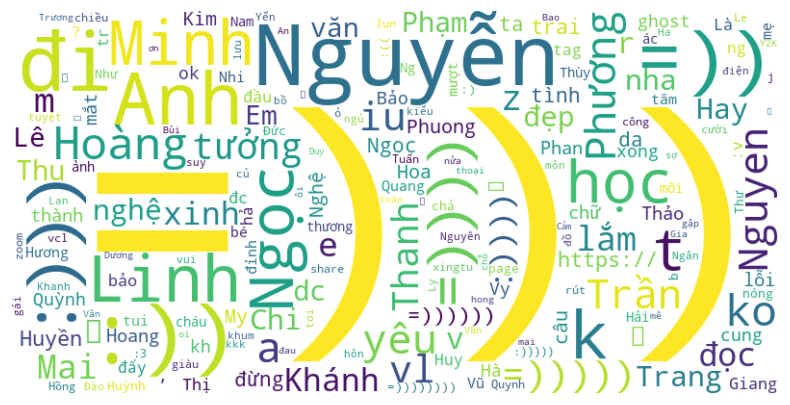

In [53]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tf_score)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
# Check if a word is there in sentence list
def check_sent(word, sentences): 
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = [sentences[i] for i in range(0, len(final)) if final[i]]
    return int(len(sent_len))


# Step 4: Calculate IDF for each word
idf_score = {}
for each_word in total_words:
    each_word = each_word.replace('.','')
    if each_word not in stop_words:
        if each_word in idf_score:
            idf_score[each_word] = check_sent(each_word, total_sentences)
        else:
            idf_score[each_word] = 1

# Performing a log and divide
idf_score.update((x, math.log(int(total_sent_len)/y)) for x, y in idf_score.items())

print(idf_score)

# Step 5: Calculating TF*IDF
tf_idf_score = {key: tf_score[key] * idf_score.get(key, 0) for key in tf_score.keys()} 
print(tf_idf_score)

{'Duy': 1.4611260095806748, 'Phương': 1.4611260095806748, 'nói': 0.9860676096733151, 'như': 0.5287491399548954, 'cách': 0.5448352777065197, 'bồ': 1.5166958607354855, 'đang': 0.4228568508200336, 'chăm': 1.6380567177397531, 'tôi': 0.7815844810765081, 'z,': 5.765191102784844, 'tự': 2.3639937211226894, 'nhiên': 0.8093640451835838, 'liệt': 5.765191102784844, 'kê': 5.765191102784844, 'ra': 0.4973329437215164, 'cũng': 1.4747316616364534, 'thấy': 1.0556609014725105, 'mình': 0.7153350955353075, 'khó': 1.2113142111843036, 'thế': 0.9210040163262533, 'nhờ': 1.2992829841302609, '=)))': 0.7612447968393854, 'Cảm': 1.5456833976087379, 'ơn': 0.8599163243464152, 'sốp,': 5.765191102784844, 'bài': 0.7679788290207294, 'này': 0.4973329437215164, 'rất': 1.1208002036434719, 'hữu': 5.765191102784844, 'ích': 5.765191102784844, 'và': 0.7282385003712155, 'nghĩa': 2.7206686650614214, 'nghe': 0.5129176747382147, 'ấm': 0.9945064783191798, 'lòng': 1.7221398349502943, '🌷': 4.155753190350744, 'Hay': 0.8235486801755403,

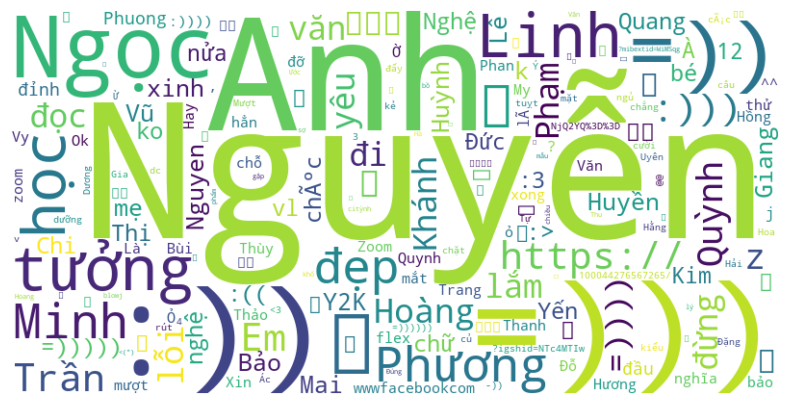

In [59]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tf_idf_score)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
# Get top N important words in the document
def get_top_n(dict_elem, n):
    result = dict(sorted(dict_elem.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

from operator import itemgetter
get_top_n(tf_idf_score, 20)

{'Nguyễn': 0.009979983054033864,
 'Anh': 0.006441467437586944,
 '=)))': 0.005395768261636213,
 ':))': 0.004880263163773852,
 'Ngọc': 0.004516696427193117,
 '🙂': 0.004296189470524771,
 '=))': 0.004267562170566824,
 'tưởng': 0.003905385845741511,
 'Linh': 0.003810389457340957,
 '😞': 0.0037279033127666267,
 'học': 0.003673620366971369,
 'Phương': 0.0036718805576162333,
 'Minh': 0.00361584145841792,
 'đẹp': 0.0036051867748690485,
 'https://': 0.0035008623442989166,
 'Em': 0.0035005988278349986,
 'Trần': 0.0034854310282084575,
 ':)))': 0.0033786437287665135,
 '🥲': 0.003244783860349622,
 'z': 0.003001343385401727}

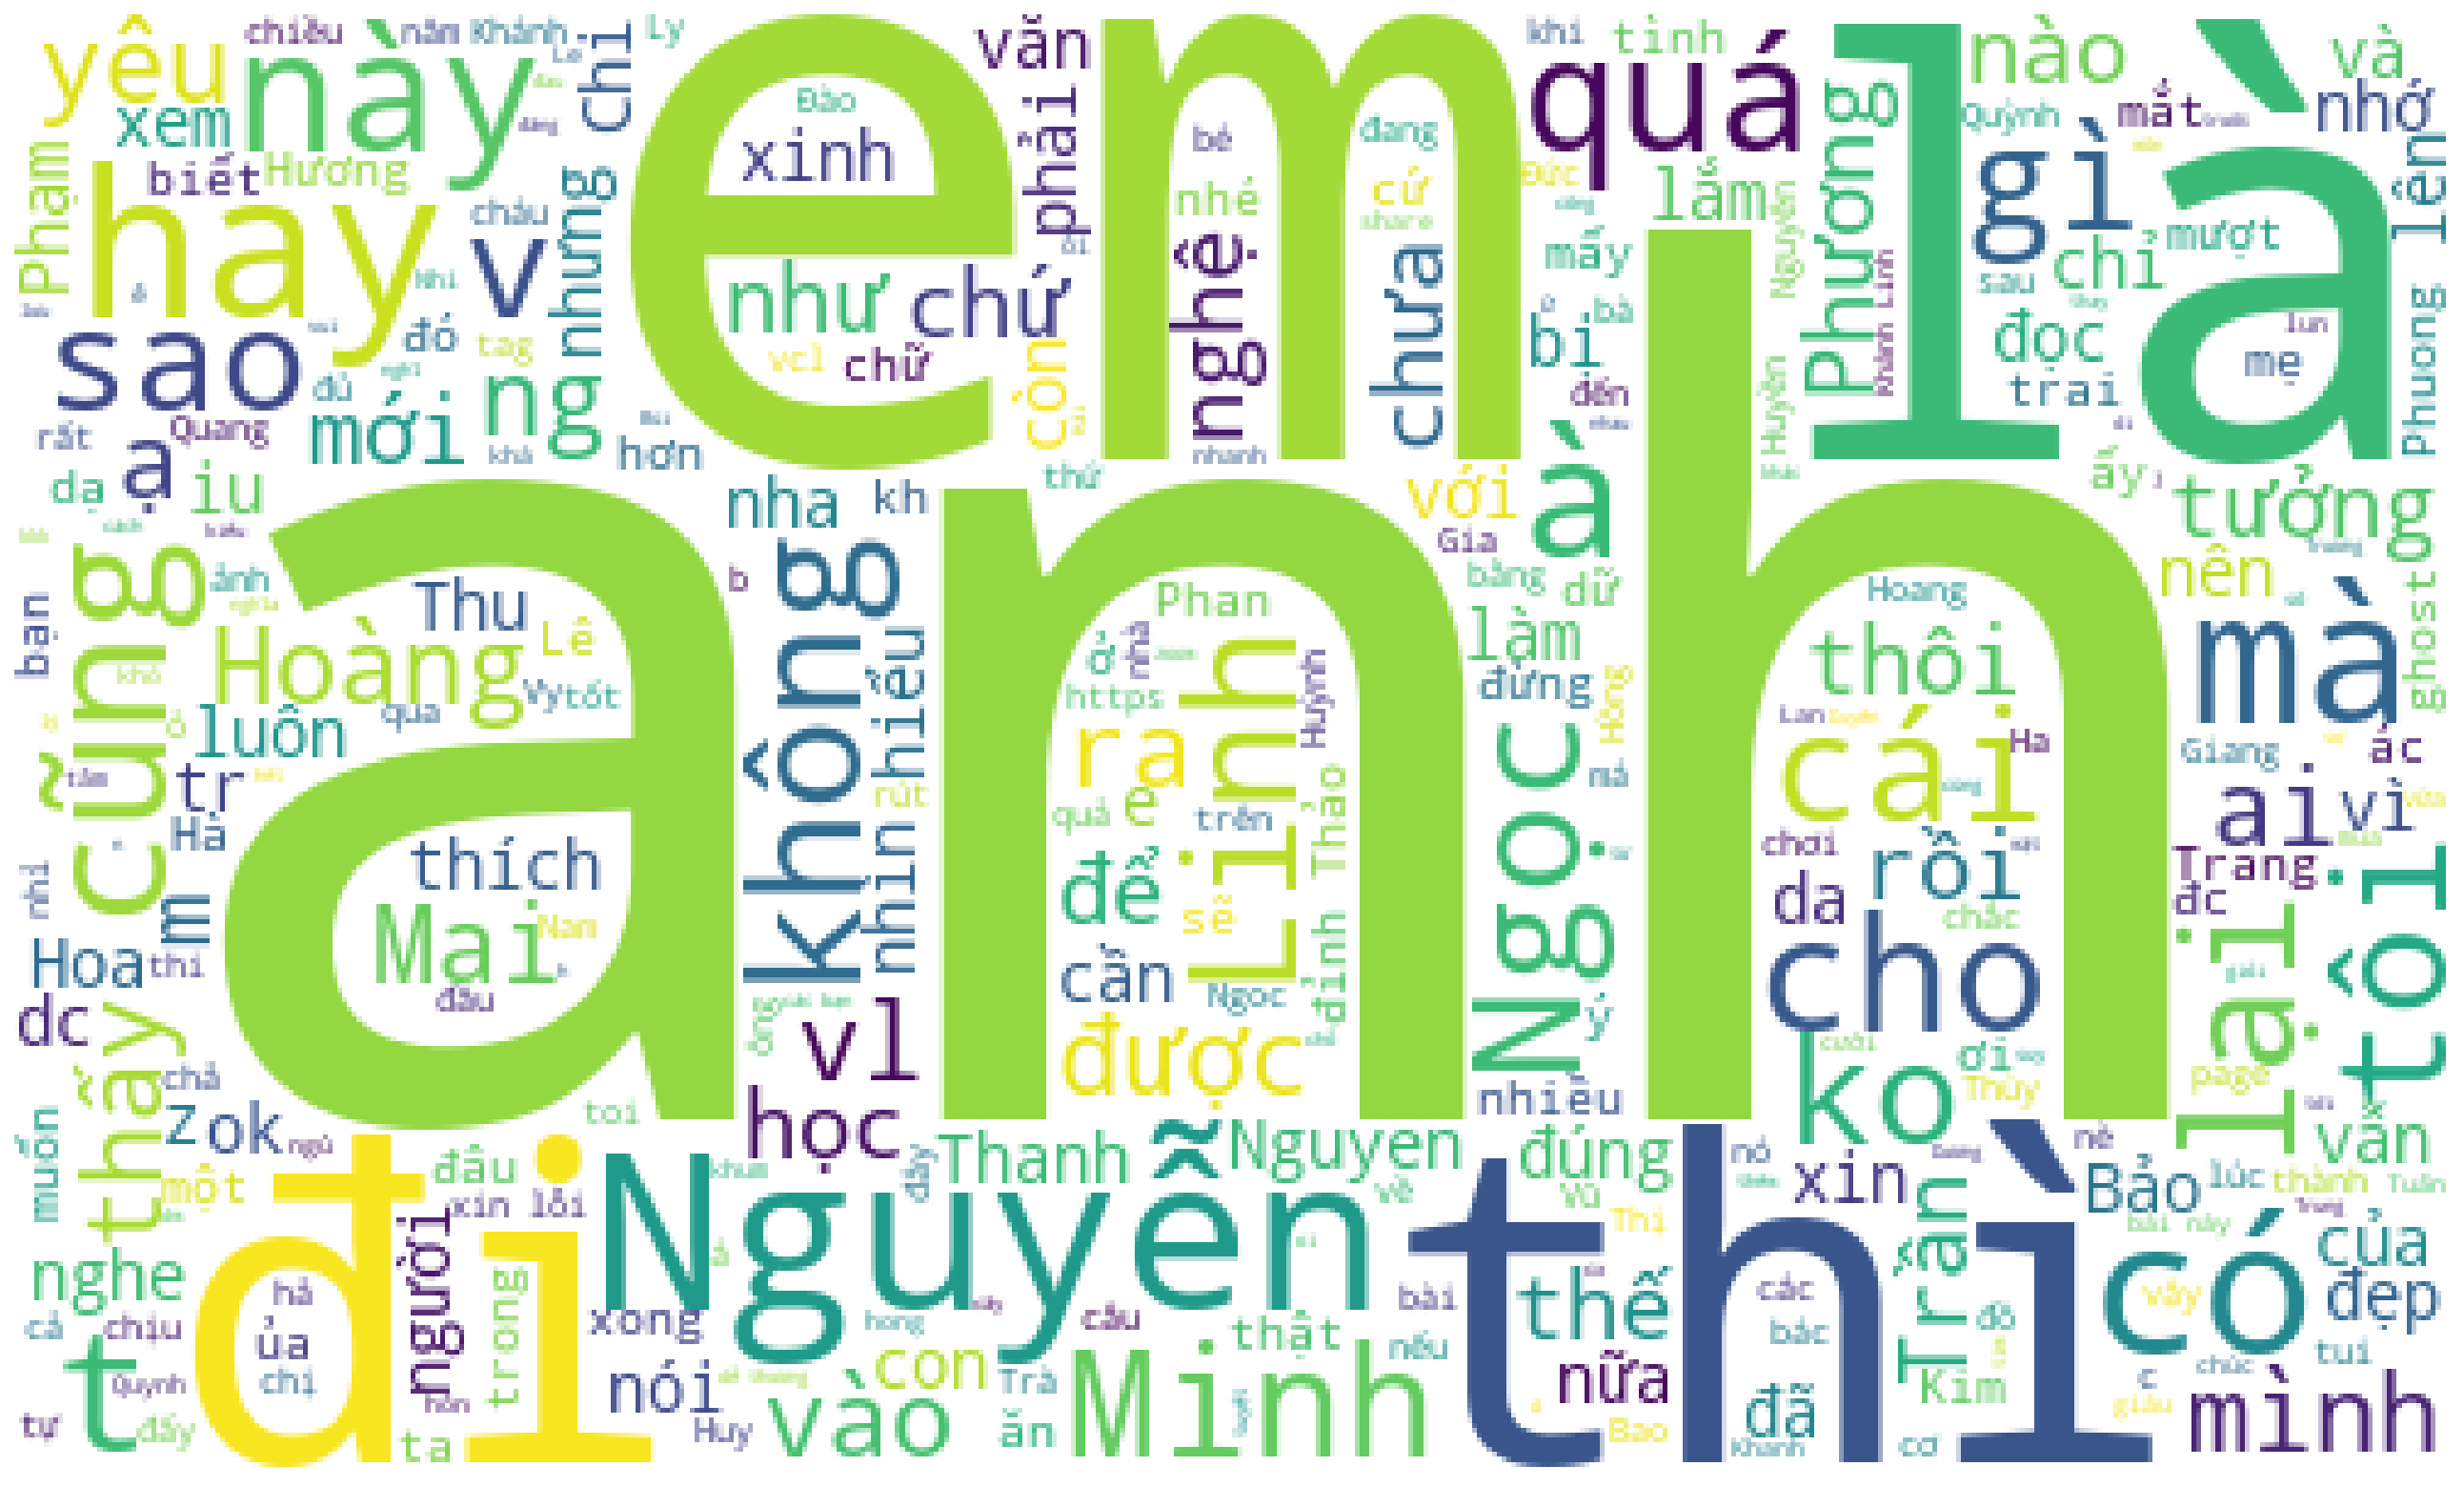

In [56]:
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
texto = text

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Statistic positive, negative, neutral words in comments

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

post_cmt_analyze = post_df_full_with_reactions.copy()

#labeling comments
def label_comment(comment):
    # Keyword identification
    positive_keywords = ['tuyệt', 'hay', 'cuốn', "tuyệt vời", "hạnh phúc", "thích"]
    negative_keywords = ['dở', "tệ", "không hài lòng", "không thích"]
    
    # Convert comments to lowercase for easier matching
    comment_lower = comment.lower()
    
    # check if comments contains keyword 
    if any(keyword in comment_lower for keyword in positive_keywords):
        return 'positive'
    elif any(keyword in comment_lower for keyword in negative_keywords):
        return 'negative'
    else:
        return 'neutral'

# Apply a function to label each comment in the DataFrame
post_cmt_analyze['label'] = post_cmt_analyze['comments_full'].apply(label_comment)

# Splitting the training and testing sets
train_data, test_data = train_test_split(post_cmt_analyze, test_size=0.2, random_state=42)

# Text preprocessing and converting it into vector format
vectorizer = TfidfVectorizer(stop_words = ['đã không', 'gần hết', 'tỏ ra', 'nói nhỏ', 'thúng thắng', 'từ loại', 'bao nhiêu', 'ăn làm', 'phỉ phui', 'chứ như', 'vung thiên địa', 'sang sáng', 'tại đâu', 'ông từ', 'giữa lúc', 'giờ đây', 'câu hỏi', 'không điều kiện', 'khẳng định', 'chốc chốc', 'lấy ra', 'nước xuống', 'nói là', 'sau đó', 'là phải', 'về không', 'dành dành', 'làm tăng', 'có tháng', 'tất cả bao nhiêu', 'nhìn theo', 'ơ kìa', 'cho được', 'ầu ơ', 'trong này', 'ối giời', 'tránh khỏi', 'ứ hự', 'chẳng nữa', 'cần số', 'phải rồi', 'đã thế', 'khó chơi', 'ờ ờ', 'sẽ hay', 'đưa chuyện', 'lượng số', 'cơ cùng', 'cho rằng', 'lúc này', 'quan trọng', 'ăn chung', 'vài điều', 'đang tay', 'lòng không', 'tới nơi', 'chết thật', 'cha chả', 'tăng cấp', 'ý chừng', 'đưa em', 'căn tính', 'chắc người', 'này nọ', 'rén bước', 'mỗi lúc', 'căn cắt', 'bất kể', 'ai nấy', 'ba ngày', 'bất quá', 'ráo cả', 'chu cha', 'bằng nào', 'đủ nơi', 'thực vậy', 'tại nơi', 'tha hồ', 'ăn hỏi', 'sử dụng', 'cảm ơn', 'ào vào', 'duy chỉ', 'đâu đây', 'ngộ nhỡ', 'vài nơi', 'biết mình', 'thường tại', 'trong mình', 'ô kìa', 'trước đây', 'vừa lúc', 'đâu cũng', 'thời điểm', 'từng ấy', 'ở được', 'cùng cực', 'khó nghĩ', 'vùng nước', 'quá tuổi', 'cật sức', 'thiếu điểm', 'dạ khách', 'chắc ăn', 'lần khác', 'tột cùng', 'tuần tự', 'những là', 'tự ý', 'bởi thế', 'thục mạng', 'trước ngày', 'tuốt tuồn tuột', 'trong ngoài', 'hiện nay', 'dù cho', 'thuộc bài', 'nữa khi', 'chịu chưa', 'không hay', 'thật sự', 'thà rằng', 'đặt mức', 'thậm từ', 'nhằm vào', 'dù sao', 'như không', 'bấy lâu nay', 'tuyệt nhiên', 'ngày đến', 'thích ý', 'thế sự', 'nghe chừng', 'đúng ngày', 'bộ thuộc', 'để giống', 'chưa dễ', 'ông nhỏ', 'thấy tháng', 'ba họ', 'vì chưng', 'càng hay', 'lấy có', 'tự lượng', 'thích tự', 'cơ mà', 'thật ra', 'thích cứ', 'ra ngôi', 'chuyển tự', 'ở đây', 'xon xón', 'dẫu rằng', 'ra tay', 'thường thôi', 'vì rằng', 'bất kì', 'xin gặp', 'thuần ái', 'lúc đi', 'đủ số', 'dễ thấy', 'nhờ đó', 'hơn là', 'thoạt nghe', 'ví phỏng', 'mà lại', 'nhanh lên', 'người khách', 'quả là', 'chưa dùng', 'cứ điểm', 'mỗi lần', 'lượng từ', 'nói riêng', 'khác nào', 'trời đất ơi', 'vị tất', 'bỏ mình', 'nói khó', 'quá mức', 'vèo vèo', 'từ tại', 'cuối cùng', 'phải cách', 'nhận nhau', 'ngày này', 'đáng lý', 'trước khi', 'sở dĩ', 'do vì', 'thường tính', 'đúng với', 'chung cho', 'mà không', 'phải biết', 'ái chà', 'hết nói', 'đâu đâu', 'chành chạnh', 'bỗng nhiên', 'có chăng là', 'ba tăng', 'trừ phi', 'ông tạo', 'như quả', 'nhất nhất', 'đưa tay', 'ngôi thứ', 'về phần', 'trệu trạo', 'sang năm', 'tấm bản', 'để phần', 'bỏ lại', 'từ đó', 'vừa mới', 'sì sì', 'thậm cấp', 'buổi sớm', 'bỏ mất', 'hay hay', 'gây giống', 'hay tin', 'nơi nơi', 'tại đây', 'hết của', 'dễ gì', 'tính cách', 'vâng vâng', 'chùn chũn', 'con nhà', 'gặp khó khăn', 'đều nhau', 'đại loại', 'nếu như', 'một khi', 'trong số', 'qua ngày', 'không ai', 'nói lại', 'riêng từng', 'nghĩ xa', 'lời nói', 'chứ không phải', 'lần tìm', 'trước tiên', 'cả người', 'trong vùng', 'tới gần', 'quả thế', 'thường khi', 'ông ấy', 'tháng ngày', 'xa xả', 'dễ dùng', 'ví bằng', 'chung quy', 'lấy làm', 'thấp thỏm', 'cây nước', 'cô ấy', 'đặc biệt', 'nào là', 'vào khoảng', 'kể như', 'tạo ra', 'dầu sao', 'về nước', 'nhón nhén', 'thích thuộc', 'sáng rõ', 'lại nữa', 'thực hiện', 'chưa từng', 'bấy nay', 'cấp số', 'đặt làm', 'nhớ ra', 'vung tàn tán', 'tắp lự', 'chung cuộc', 'từ khi', 'tuy có', 'có thể', 'như thế nào', 'ối dào', 'dễ như chơi', 'lên nước', 'lấy thế', 'lên số', 'cho tới', 'chứ còn', 'trả của', 'đến thế', 'gì gì', 'trước nay', 'thảo hèn', 'lúc đó', 'nhận việc', 'mang mang', 'không những', 'nào phải', 'trước đó', 'lớn nhỏ', 'thì thôi', 'tuổi cả', 'ra ý', 'quá tin', 'tuy rằng', 'dễ ngươi', 'con dạ', 'để không', 'cứ như', 'bên cạnh', 'tò te', 'chịu tốt', 'không kể', 'nức nở', 'lấy được', 'bỏ xa', 'lấy giống', 'tự tính', 'đến khi', 'vừa rồi', 'chết tiệt', 'sau cùng', 'cao thế', 'sao đang', 'qua chuyện', 'chỉ là', 'cả ăn', 'ba bản', 'ngồi bệt', 'làm dần dần', 'mang nặng', 'rồi đây', 'ăn sáng', 'cả nghĩ', 'cho đến khi', 'tình trạng', 'phần nào', 'tanh tanh', 'không gì', 'đưa cho', 'gì đó', 'sao bằng', 'ra gì', 'bước tới', 'tiếp tục', 'lấy cả', 'chung cục', 'xem ra', 'vậy mà', 'nhằm khi', 'trả ngay', 'có người', 'lên cao', 'phần việc', 'thuộc lại', 'hết cả', 'bất thình lình', 'trực tiếp', 'ấy là', 'ngay lập tức', 'ở vào', 'ai đó', 'cùng tuổi', 'dù rằng', 'vốn dĩ', 'bởi ai', 'thốt nhiên', 'từng phần', 'bằng người', 'số người', 'lại người', 'vài nhà', 'nhờ có', 'khi trước', 'hay sao', 'nữa rồi', 'bấy lâu', 'đồng thời', 'dở chừng', 'đánh giá', 'tìm bạn', 'tên họ', 'mất còn', 'khác nhau', 'dẫu mà', 'ngồi sau', 'chỉ tên', 'ngồi trệt', 'lên ngôi', 'dùng hết', 'vào đến', 'cũng vậy thôi', 'nước ăn', 'cho nên', 'phía bên', 'ăn cuộc', 'nói lên', 'biết đâu đấy', 'đáo để', 'giờ đến', 'đang thì', 'liên quan', 'nhiên hậu', 'nếu có', 'tha hồ chơi', 'ngõ hầu', 'từng nhà', 'lần sang', 'chú dẫn', 'đủ dùng', 'chắc hẳn', 'được lời', 'văng tê', 'ái dà', 'chớ không', 'chính điểm', 'dễ sợ', 'chao ôi', 'khi nên', 'bằng ấy', 'như chơi', 'ôi chao', 'họ xa', 'cật lực', 'cụ thể là', 'phải lời', 'chăng nữa', 'đầy năm', 'có số', 'ơi là', 'lúc khác', 'nghe không', 'con tính', 'đầu tiên', 'sáng thế', 'thốc tháo', 'thế ra', 'vậy thì', 'còn về', 'ngay cả', 'hết ý', 'xuất hiện', 'chưa chắc', 'mọi giờ', 'nhất mực', 'sao bản', 'sắp đặt', 'làm lòng', 'ăn ngồi', 'vậy ư', 'chứ gì', 'xử lý', 'vừa khi', 'nhất luật', 'trên bộ', 'bấy chầy', 'lại quả', 'tà tà', 'cơ hồ', 'nhỏ người', 'làm nên', 'bây bẩy', 'nếu vậy', 'người khác', 'tiếp đó', 'phía dưới', 'biết đâu chừng', 'dạ dài', 'còn nữa', 'có cơ', 'tôi con', 'quá lời', 'cách đều', 'để đến nỗi', 'thế nên', 'xa xa', 'hoàn toàn', 'mở mang', 'nhất tâm', 'vài người', 'phải khi', 'vô luận', 'thời gian tính', 'sáng ý', 'thanh không', 'một lúc', 'nói phải', 'chuyển đạt', 'đầy tuổi', 'tay quay', 'chung quy lại', 'chắc chắn', 'bao giờ', 'từ căn', 'thái quá', 'lấy vào', 'chứ lị', 'biết việc', 'giữ lấy', 'đưa tới', 'tiện thể', 'khi nào', 'như vậy', 'vừa qua', 'veo veo', 'cho biết', 'ngôi nhà', 'những ai', 'nên tránh', 'đã đủ', 'tuy vậy', 'nhất thiết', 'ăn chắc', 'không có gì', 'biết bao nhiêu', 'đều bước', 'giờ lâu', 'bỏ việc', 'đại phàm', 'lại ăn', 'qua đi', 'hoặc là', 'ngay bây giờ', 'làm thế nào', 'nhất định', 'nghe thấy', 'trước tuổi', 'mà vẫn', 'tăm tắp', 'về tay', 'ạ ơi', 'nhận được', 'phía trước', 'chỉ có', 'tránh ra', 'ra người', 'không đầy', 'nghe hiểu', 'phía trên', 'lần lần', 'tỏ vẻ', 'ba ngôi', 'phía bạn', 'trong khi', 'thì ra', 'đây này', 'bỏ riêng', 'lúc lâu', 'bản ý', 'bấy giờ', 'nghe được', 'khác khác', 'cùng tột', 'coi bộ', 'bán thế', 'ô hay', 'tên tự', 'qua khỏi', 'đã vậy', 'chính bản', 'ít nhiều', 'đưa xuống', 'bỗng chốc', 'quay lại', 'không bao lâu', 'không cùng', 'nào đó', 'vẫn thế', 'hay nói', 'còn như', 'dễ thường', 'ngày xửa', 'vâng ý', 'dùng đến', 'mọi khi', 'nhờ chuyển', 'ngay tức thì', 'khó thấy', 'ngay khi đến', 'nhận biết', 'ngay từ', 'ra đây', 'chưa có', 'cái đã', 'một cách', 'của ngọt', 'do vậy', 'đánh đùng', 'quan tâm', 'lên cơn', 'bất đồ', 'bỏ không', 'ráo trọi', 'làm lấy', 'đưa vào', 'sốt sột', 'mọi thứ', 'hay nhỉ', 'khó khăn', 'ồ ồ', 'sự thế', 'lấy xuống', 'ra chơi', 'cho tới khi', 'hầu hết', 'nói rõ', 'xuất kì bất ý', 'nhà làm', 'nhận ra', 'đưa ra', 'nữa là', 'nếu cần', 'thời gian', 'thế thôi', 'đâu phải', 'qua tay', 'đâu đó', 'oai oái', 'tại đó', 'mới hay', 'nhà ngươi', 'lúc đến', 'không thể', 'nhìn nhận', 'thật vậy', 'trong lúc', 'biết đâu', 'công nhiên', 'tuy thế', 'phải lại', 'vị trí', 'bỗng dưng', 'chưa kể', 'số loại', 'tránh tình trạng', 'của tin', 'họ gần', 'xin vâng', 'thế thế', 'đây đó', 'nhận làm', 'tập trung', 'nhớ bập bõm', 'chăn chắn', 'người nhận', 'nước lên', 'không phải không', 'dẫu sao', 'chung ái', 'tức thì', 'cụ thể như', 'bài bác', 'giống như', 'suýt nữa', 'từ ái', 'đặt ra', 'phỏng như', 'có đáng', 'nhận thấy', 'trả trước', 'hơn trước', 'tìm việc', 'mỗi một', 'nếu được', 'ở như', 'chứ không', 'những như', 'chí chết', 'bỏ nhỏ', 'chưa bao giờ', 'giống người', 'hết chuyện', 'dùng làm', 'ứ ừ', 'cùng ăn', 'nhất loạt', 'xa tắp', 'luôn cả', 'lần theo', 'không cần', 'lấy ráo', 'đến lời', 'phải cái', 'tha hồ ăn', 'sự việc', 'thực sự', 'điểm gặp', 'bỗng không', 'nhìn chung', 'làm được', 'ngày càng', 'không bán', 'điều gì', 'ít hơn', 'tính người', 'cuối điểm', 'dạ bán', 'chắc lòng', 'vào vùng', 'tuốt tuột', 'dễ khiến', 'đến thì', 'tiếp theo', 'ngăn ngắt', 'để lại', 'vâng dạ', 'cũng như', 'đã là', 'bất ngờ', 'hãy còn', 'nói ra', 'giảm thấp', 'nói thêm', 'ví thử', 'ít ra', 'chắc vào', 'nước cùng', 'bây chừ', 'chứ sao', 'bài cái', 'ừ ào', 'thuộc từ', 'từng cái', 'trước kia', 'anh ấy', 'ăn chịu', 'tự khi', 'những muốn', 'ngày qua', 'nhiệt liệt', 'à ơi', 'bằng không', 'nghĩ tới', 'có ngày', 'tìm hiểu', 'khó biết', 'bất chợt', 'người hỏi', 'toé khói', 'làm ngay', 'giờ này', 'thương ôi', 'vì vậy', 'có phải', 'như thể', 'đến cùng cực', 'như thế', 'xiết bao', 'bất tử', 'căn cái', 'xềnh xệch', 'như trước', 'làm sao', 'ít thấy', 'dài ra', 'cao xa', 'có thế', 'sa sả', 'quá trình', 'phải giờ', 'tự cao', 'thường hay', 'nhận họ', 'yêu cầu', 'làm đúng', 'là nhiều', 'vừa vừa', 'nước bài', 'khá tốt', 'đại để', 'tấm các', 'cái họ', 'cô tăng', 'ví dù', 'sáng ngày', 'vào gặp', 'ngày giờ', 'một vài', 'cần cấp', 'như tuồng', 'khác xa', 'dù dì', 'ngày xưa', 'điểm đầu tiên', 'lên mạnh', 'bây nhiêu', 'thường sự', 'có nhiều', 'ô kê', 'kể cả', 'đến nỗi', 'đều đều', 'cứ việc', 'phải chi', 'hay làm', 'khác gì', 'thường xuất hiện', 'bởi thế cho nên', 'ngoài ra', 'ý da', 'thế thì', 'cho đến nỗi', 'biết chắc', 'gây thêm', 'từng giờ', 'vì thế', 'nhìn lại', 'nghe rõ', 'bởi đâu', 'khoảng không', 'vấn đề quan trọng', 'tức tốc', 'tính căn', 'ngày nọ', 'đáng số', 'sẽ biết', 'cơ hội', 'trong đó', 'ắt hẳn', 'thanh điểm', 'nào đâu', 'điểm chính', 'khác thường', 'đưa tin', 'phương chi', 'úi dào', 'quả thật', 'nói xa', 'chung chung', 'vô hình trung', 'ăn người', 'vùng lên', 'nhung nhăng', 'thường bị', 'thuộc cách', 'biết thế', 'bị vì', 'thế lại', 'cơ dẫn', 'nhân dịp', 'bỏ bà', 'lấy lý do', 'lâu ngày', 'phù hợp', 'đáng lí', 'mọi nơi', 'cho nhau', 'có điều kiện', 'bên có', 'chớ như', 'ngày nào', 'nhất quyết', 'phải chăng', 'có nhà', 'đến hay', 'thấp cơ', 'qua lần', 'bộ điều', 'mà cả', 'có chăng', 'cao thấp', 'nói với', 'làm vì', 'giá trị', 'nên người', 'ngoài xa', 'thêm vào', 'lâu các', 'không để', 'thế đó', 'khỏi nói', 'cho chắc', 'cả thảy', 'làm gì', 'buổi mới', 'từ tính', 'nhớ lại', 'một ít', 'bởi vậy', 'giữ ý', 'cùng với', 'trực tiếp làm', 'tới mức', 'hay đâu', 'chúng tôi', 'chú mày', 'nghe như', 'chọn ra', 'âu là', 'bây giờ', 'đến ngày', 'tự vì', 'là cùng', 'nhìn xuống', 'đó đây', 'xăm xăm', 'làm riêng', 'đến nay', 'tăng chúng', 'tháng tháng', 'cái đó', 'ngày ấy', 'lượng cả', 'bao nả', 'có họ', 'mở ra', 'thoạt nhiên', 'xăm xúi', 'lúc nào', 'nói qua', 'đáng lẽ', 'ít nhất', 'vài tên', 'nhỡ ra', 'bập bõm', 'do đó', 'không còn', 'ít có', 'như sau', 'thanh điều kiện', 'hết ráo', 'số là', 'lần nào', 'hay là', 'hỏi lại', 'thường đến', 'tốt mối', 'rõ thật', 'thứ đến', 'bởi nhưng', 'đưa đến', 'ít khi', 'thật thà', 'thực tế', 'quá tay', 'chú mình', 'ừ ừ', 'việc gì', 'không tính', 'bởi tại', 'tạo điều kiện', 'có ai', 'chung nhau', 'tạo ý', 'gần bên', 'làm lại', 'rất lâu', 'bỗng nhưng', 'có vẻ', 'ngày tháng', 'có dễ', 'kể từ', 'nhà việc', 'phần nhiều', 'đến xem', 'sau đây', 'đủ điều', 'nước nặng', 'khó nghe', 'tênh tênh', 'dễ ăn', 'cao số', 'phải người', 'đã lâu', 'a lô', 'có ăn', 'bởi chưng', 'bản riêng', 'không bao giờ', 'vượt khỏi', 'được tin', 'thì phải', 'đúng tuổi', 'từ từ', 'lời chú', 'càng càng', 'nghe đâu như', 'bỗng đâu', 'nói toẹt', 'sau hết', 'để được', 'như trên', 'hay không', 'cô quả', 'luôn tay', 'thật chắc', 'theo tin', 'đơn vị', 'là là', 'quá đáng', 'rõ là', 'nhà tôi', 'ít thôi', 'chú khách', 'ngay thật', 'nói đủ', 'phải tay', 'lại bộ', 'cá nhân', 'tất cả', 'nhanh tay', 'nếu không', 'hơn cả', 'có khi', 'những khi', 'không phải', 'phỏng tính', 'duy có', 'thay đổi tình trạng', 'hỏi xem', 'có chứ', 'lúc trước', 'không ngoài', 'quan trọng vấn đề', 'khó làm', 'ngay lúc này', 'cho hay', 'tên chính', 'phần sau', 'bằng như', 'tông tốc', 'chịu lời', 'lấy lại', 'cách bức', 'số phần', 'lấy số', 'rồi sao', 'ba cùng', 'vả lại', 'cơ chỉ', 'tốt ngày', 'tự tạo', 'rút cục', 'ở năm', 'như ai', 'giá trị thực tế', 'tạo cơ hội', 'mọi việc', 'gây cho', 'bước khỏi', 'thà là', 'cảm thấy', 'rồi ra', 'chứ ai', 'xem lại', 'từng đơn vị', 'chui cha', 'lấy để', 'được cái', 'chầm chập', 'tất thảy', 'thi thoảng', 'với lại', 'chẳng lẽ', 'thỉnh thoảng', 'tù tì', 'lại cái', 'dễ nghe', 'có ý', 'cả tin', 'lại nói', 'thêm chuyện', 'chúng ta', 'ngồi không', 'bỗng thấy', 'phải không', 'thế mà', 'cùng nhau', 'cũng nên', 'phần lớn', 'coi mòi', 'trước nhất', 'dễ đâu', 'đến giờ', 'để lòng', 'cả thể', 'có được', 'ăn quá', 'tuy là', 'từ thế', 'so với', 'chớ gì', 'nhà chung', 'nhớ lấy', 'bội phần', 'đành đạch', 'đến cùng', 'làm cho', 'tuy đã', 'cho tin', 'gặp phải', 'cho đến', 'thực hiện đúng', 'tới thì', 'ăn hết', 'xăm xắm', 'chùn chùn', 'thật lực', 'làm mất', 'chung qui', 'ớ này', 'bay biến', 'bập bà bập bõm', 'tránh xa', 'ở lại', 'song le', 'từ ấy', 'một số', 'tất tật', 'rồi nữa', 'được nước', 'chợt nhìn', 'nhất là', 'cả nhà', 'ngay tức khắc', 'ừ thì', 'ngay lúc', 'lần trước', 'cụ thể', 'có đâu', 'gần đây', 'cực lực', 'sau cuối', 'đến nơi', 'đảm bảo', 'lâu nay', 'từ nay', 'lên xuống', 'rồi thì', 'lớn lên', 'biết bao', 'buổi làm', 'mà thôi', 'mỗi người', 'mọi người', 'tại tôi', 'tất tần tật', 'thế à', 'bởi sao', 'phè phè', 'ngày cấp', 'thế nào', 'là vì', 'lại đây', 'đến cả', 'vô vàn', 'sau này', 'ăn trên', 'quay đi', 'tháng năm', 'chưa tính', 'tốt hơn', 'mới rồi', 'hỏi xin', 'khó tránh', 'tự ăn', 'tốt bạn', 'làm tin', 'thế chuẩn bị', 'chính là', 'cô mình', 'ít biết', 'lần này', 'đặt mình', 'trả lại', 'tại vì', 'quá bán', 'đến đâu', 'như là', 'đúng ra', 'quay số', 'từ điều', 'chợt nghe', 'bấy chừ', 'bước đi', 'còn thời gian', 'cả ngày', 'chọn bên', 'lại thôi', 'dùng cho', 'nhằm lúc', 'người người', 'vậy nên', 'phía sau', 'bất cứ', 'thốt thôi', 'chớ chi', 'mỗi ngày', 'ào ào', 'không được', 'thì giờ', 'gần như', 'ơ hay', 'rồi sau', 'mọi lúc', 'nếu mà', 'xuất kỳ bất ý', 'sang tay', 'tin thêm', 'cơ chừng', 'a ha', 'đối với', 'gây ra', 'cách nhau', 'tuốt luốt', 'vung tán tàn', 'vượt quá', 'tính phỏng', 'từng thời gian', 'luôn luôn', 'chúng ông', 'thế thường', 'nói tốt', 'lại còn', 'ren rén', 'lại làm', 'biết chừng nào', 'bỏ cha', 'cái gì', 'rồi tay', 'xa cách', 'làm bằng', 'ngọn nguồn', 'thanh thanh', 'ối giời ơi', 'quá thì', 'xảy ra', 'sau chót', 'trong ấy', 'tại lòng', 'thanh chuyển', 'trước sau', 'vạn nhất', 'tối ư', 'chỉ chính', 'tựu trung', 'chẳng phải', 'xem số', 'thường thường', 'hay biết', 'nào cũng', 'cho ăn', 'có điều', 'đưa về', 'đặt để', 'với nhau', 'trước hết', 'rằng là', 'thay đổi', 'theo bước', 'tốt bộ', 'bằng vào', 'bán cấp', 'lấy thêm', 'đến bao giờ', 'cao sang', 'riu ríu', 'vào lúc', 'thật tốt', 'khi khác', 'cho về', 'vài ba', 'nghe nhìn', 'thanh tính', 'áng như', 'chơi họ', 'hỗ trợ', 'vâng chịu', 'xa gần', 'bằng nấy', 'chẳng những', 'bởi vì', 'bỏ quá', 'lên đến', 'thứ bản', 'đến lúc', 'ít nữa', 'phải như', 'thì là', 'giảm chính', 'gần đến', 'nên chi', 'nghe tin', 'cao lâu', 'thế là', 'lấy sau', 'gần ngày', 'tìm cách', 'phỏng theo', 'ăn riêng', 'ăn về', 'thành ra', 'đáng kể', 'chăng chắc', 'các cậu', 'thình lình', 'tuy nhiên', 'rồi xem', 'bản thân', 'phía trong', 'bà ấy', 'nên chăng', 'cùng chung', 'nhìn thấy', 'kể tới', 'đến điều', 'dữ cách', 'cần gì', 'sao vậy', 'thật là', 'có chuyện', 'giờ đi', 'bấy nhiêu', 'nói thật', 'xa nhà', 'bắt đầu', 'sao cho', 'chính thị', 'ở trên', 'không nhận', 'nên làm', 'dần dần', 'về sau', 'mang lại', 'lần sau', 'nghĩ ra', 'khoảng cách', 'buổi ngày', 'đây rồi', 'ít quá', 'là thế nào', 'thực ra', 'một cơn', 'nhằm để', 'ngày ngày', 'biết mấy', 'nếu thế', 'nghe đâu', 'làm tôi', 'đặt trước', 'trếu tráo', 'tăng thêm', 'cũng thế', 'làm như', 'phăn phắt', 'than ôi', 'mọi sự', 'nhất sinh', 'chuẩn bị', 'ráo nước', 'tắp tắp', 'dạ con', 'số cụ thể', 'ăn tay', 'ông ổng', 'ra điều', 'nước quả', 'ngay khi', 'năm tháng', 'bất giác', 'nhưng mà', 'dài lời', 'nói ý', 'là ít', 'chị bộ', 'đã hay', 'cũng vậy', 'ở nhờ', 'nghe trực tiếp', 'ngoài này', 'bất quá chỉ', 'làm tại', 'thảo nào', 'em em', 'cho đang', 'quá ư', 'rốt cục', 'nhất đán', 'ra bài', 'trở thành', 'nhất tề', 'răng răng', 'thành thử', 'cổ lai', 'thật quả', 'ắt là', 'loại từ', 'thốt nói', 'xa tanh', 'chứ lại', 'nói chung', 'làm theo', 'nhân tiện', 'không chỉ', 'lại giống', 'không dùng', 'tại sao', 'cả nghe', 'quay bước', 'bất kỳ', 'phỏng nước', 'không biết', 'thiếu gì', 'á à', 'không có', 'xoành xoạch', 'đâu có', 'biết được', 'rốt cuộc', 'qua thì', 'bên bị', 'lúc sáng', 'bắt đầu từ', 'khó nói', 'như ý', 'đâu nào', 'thời gian sử dụng', 'nặng mình', 'nghe nói', 'ra lời', 'chắc dạ', 'quá nhiều', 'sau sau', 'tạo nên', 'chia sẻ', 'thanh ba', 'ngày rày', 'ra vào', 'số cho biết', 'ô hô', 'thêm giờ', 'theo như', 'con con', 'ít lâu', 'điều kiện', 'vậy ra', 'ý hoặc', 'những lúc', 'ở đó', 'như nhau', 'cao răng', 'vậy là', 'chịu ăn', 'bằng nhau', 'rón rén', 'để mà', 'à này', 'sau nữa', 'làm ra', 'tuổi tôi', 'nói đến', 'nói trước', 'bị chú', 'hiện tại', 'úi chà', 'đâu như', 'cách không', 'hết rồi', 'khó mở', 'chết nỗi', 'ừ nhé', 'đến tuổi', 'đại nhân', 'không cứ', 'mở nước', 'ra sao', 'lý do', 'thôi việc', 'quá bộ', 'bán dạ', 'nhược bằng', 'chị ấy', 'bất nhược', 'trên dưới', 'chính giữa', 'cũng được', 'để cho', 'thậm chí', 'cái ấy', 'ắt phải', 'bỏ mẹ', 'dần dà', 'khi không', 'nhiều ít', 'nước đến', 'số thiếu', 'tít mù', 'cả năm', 'chưa cần', 'vì sao', 'tăng thế', 'nghĩ đến', 'tìm ra', 'quả vậy', 'qua lại', 'biết trước', 'đầy phè', 'ra lại', 'nghiễm nhiên', 'dạ dạ', 'ba ba', 'giống nhau', 'tên cái', 'bỏ cuộc', 'đủ điểm', 'ôi thôi', 'dưới nước', 'nhất thì', 'tấn tới', 'lâu lâu', 'thấp xuống', 'như thường', 'nói bông', 'chớ kể', 'giảm thế', 'bất luận', 'nghe lại', 'quá giờ', 'làm tắp lự', 'bằng được', 'nào hay', 'cấp trực tiếp', 'bao lâu', 'vả chăng', 'từ giờ', 'nghe ra', 'tin vào', 'bỏ ra', 'bài bỏ', 'nhờ nhờ', 'mang về', 'nặng căn', 'tính từ', 'hơn nữa', 'ai ai', 'dễ sử dụng', 'mới đây', 'vấn đề', 'chúng mình', 'gần xa', 'vô kể', 'nặng về', 'ra bộ', 'tốc tả', 'tăng giảm', 'không khỏi', 'người mình', 'thường số', 'cao ráo', 'nghĩ lại', 'cu cậu', 'bản bộ', 'sớm ngày', 'ắt thật', 'cho thấy', 'bằng cứ', 'hơn hết', 'lúc ấy', 'cho rồi', 'cóc khô', 'nhà ngoài', 'đến gần', 'nhà khó'])
X_train = vectorizer.fit_transform(train_data['comments_full'])
X_test = vectorizer.transform(test_data['comments_full'])

# Creating and training an SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, train_data['label'])

# Predicting on the test set
predictions = clf.predict(X_test)

# Performance evaluation
accuracy = accuracy_score(test_data['label'], predictions)
print(f'Accuracy: {accuracy}')
print(classification_report(test_data['label'], predictions))


Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00         6
    positive       0.78      1.00      0.88        21

    accuracy                           0.78        27
   macro avg       0.39      0.50      0.44        27
weighted avg       0.60      0.78      0.68        27



c:\Users\ADMIN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ai', 'anh', 'ba', 'bao', 'bay', 'biến', 'biết', 'biệt', 'buổi', 'bà', 'bài', 'bác', 'bán', 'bây', 'bên', 'bông', 'bõm', 'bước', 'bạn', 'bản', 'bảo', 'bất', 'bấy', 'bẩy', 'bập', 'bắt', 'bằng', 'bệt', 'bị', 'bỏ', 'bỗng', 'bộ', 'bội', 'bởi', 'bức', 'cao', 'cha', 'chao', 'chi', 'chia', 'cho', 'chu', 'chui', 'chung', 'chuyển', 'chuyện', 'chuẩn', 'chà', 'chành', 'chí', 'chính', 'chót', 'chùn', 'chú', 'chúng', 'chăn', 'chăng', 'chũn', 'chơi', 'chưa', 'chưng', 'chạnh', 'chả', 'chầm', 'chầy', 'chập', 'chắc', 'chắn', 'chẳng', 'chết', 'chỉ', 'chị', 'chịu', 'chọn', 'chốc', 'chớ', 'chợt', 'chứ', 'chừ', 'chừng', 'coi', 'con', 'cu', 'cuối', 'cuộc', 'càng', 'cá', 'các', 'cách', 'cái', 'câu', 'cây', 'còn', 'có', 'cóc', 'cô', 'công', 'cùng', 'căn', 'cũng', 'cơ', 'cơn', 'cạnh',

In [58]:
# Create list for data
summary_data = []

# Loop 
for post_id in post_cmt_analyze['post_id'].unique():
    post_data = post_cmt_analyze[post_cmt_analyze['post_id'] == post_id]
    
    # Count the positive, negative, neutral comments
    positive_count = (post_data['label'] == 'positive').sum()
    negative_count = (post_data['label'] == 'negative').sum()
    neutral_count = (post_data['label'] == 'neutral').sum()
    
    # Add data to list 
    summary_data.append({
        'Post_ID': post_id,
        'Positive_Count': positive_count,
        'Negative_Count': negative_count,
        'Neutral_Count': neutral_count
    })

# Create dataframe from list 
summary_df = pd.DataFrame(summary_data)

# show the df 
print(summary_df)



             Post_ID  Positive_Count  Negative_Count  Neutral_Count
0    884944059658138               1               0              0
1    878691913616686               1               0              0
2    877796960372848               1               0              0
3    877028770449667               0               0              1
4    875725880579956               1               0              0
..               ...             ...             ...            ...
126  715803356572210               0               0              1
127  715501139935765               1               0              0
128  715089326643613               1               0              0
129  714837060002173               1               0              0
130  714417146710831               1               0              0

[131 rows x 4 columns]
